# Understanding Traffic Enforcement Dynamics

*Traffic Demand and Escalation Risk Patterns in IL*

Over the past decade, police departments across the United States have faced growing pressure to operate more efficiently and use officer time wisely, as their resources are limited. As traffic enforcement is one of the most common interactions between the public and law enforcement, understanding traffic stop patterns is essential for police departments looking to allocate their resources efficiently and improving performance. In order to help these organizations make smarter, data-driven decisions, this project analyzes Illinois traffic stop data to uncover patterns that can provide actionable insights for improving day-to-day operations.


This project aims to answer the following questions:
1. How do time and location shape traffic demand, and how can these patterns be used for officer staffing and deployment?
2. How do combinations of stop characteristics influence traffic stop escalation risk?

The Stanford Open Policing Project gathered and released records from millions of traffic stops by law enforcement agencies across the country. This dataset includes over 1GB of stop data from Illinois which covered all of 2010 onwards. It contains key features relevant to this analysis such as stop date and time, violation and search details, and police district which will allow for a comprehensive analysis.

Source: https://www.kaggle.com/datasets/stanford-open-policing/stanford-open-policing-project-illinois?resource=download

The README included an overview of the columns which are as follows:
- **id** = The unique ID assigned to each stop (contains the state and year)
- **state** = The two-letter code for the state in which the stop occurred
- **stop_date** = The date of the stop in YYYY-MM-DD format (if only year or quarter is reported, stop_date is set to the date at the beginning of the period)
- **stop_time** = The 24-hour time of the stop in HH:MM format
- **location_raw** = The original data value from which the county (or comparably granular location) in which the stop occurred is computed
- **county_name** = The standardized name of the county in which the stop occurred
- **county_fips** = The standardized 5-digit FIPS code in which the stop occurred
- **district** = In states where the stop county cannot be inferred, but a comparably granular location can, the granular location is stored here
- **fine_grained_location** = Any higher-resolution data about where the stop occurred such as milepost or address
- **police_department** = The police department or agency that made the stop
- **driver_gender** = The driver’s gender, as recorded by the trooper
- **driver_age_raw** = The original data value from which the driver’s age when they were stopped was computed (may be age, birth year, or birth date)
- **driver_age** = The driver’s age when they were stopped (set to NA if less than 15 or greater than or equal to 100)
- **driver_race_raw** = The original data value from which the driver’s standardized race is computed
- **driver_race** = The standardized driver race (possible values are White, Black, Hispanic, Asian, Other, and NA, with NA denoting values which are unknown)
- **violation_raw** = The violation committed by the driver (some stops may have multiple violations)
- **violation** = The violation committed by the driver, standardized into categories which are consistent across states
- **search_conducted** = A boolean indicating whether a search was performed
- **search_type_raw** = The justification for the search, in the language of the original data (NA if no search was performed)
- **search_type** = The normalized justification for the search (standardized into categories which are consistent across states if possible)
- **contraband_found** = A boolean indicating whether a search was performed and contraband was found
- **stop_outcome** = The outcome of the stop (if the stop has multiple outcomes, the most severe outcome is used)
- **is_arrested** = A boolean indicating whether an arrest was made
- **stop_duration** = The duration of the stop
- **vehicle_type**	= the vehicle type and year
- **drugs_related_stop**	= A boolean indicating whether the stop was drug related

### Loading the Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
df = pd.read_csv('IL.csv', low_memory = False)

In [3]:
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,NaN,NaN,17,Illinois State Police,F,1963.0,41.0,Caucasian,White,"Moving Violation,Speed",Speeding,False,NaN,NaN,False,Written Warning,NaN,NaN,Olds 2000,NaN,ILLINOIS STATE POLICE 17
1,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,NaN,NaN,07,Illinois State Police,M,1987.0,17.0,Caucasian,White,"Moving Violation,Traffic Sign or Signal",Safe movement,False,NaN,NaN,False,Written Warning,NaN,NaN,Linc 1990,NaN,ILLINOIS STATE POLICE 07
2,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,NaN,NaN,11,Illinois State Police,M,1981.0,23.0,Caucasian,White,"Moving Violation,Speed",Speeding,False,NaN,NaN,False,Citation,NaN,NaN,Chev 1996,NaN,ILLINOIS STATE POLICE 11
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,Cook County,17031.0,03,Illinois State Police,F,1972.0,32.0,African American,Black,"Moving Violation,Other",Moving violation,False,NaN,NaN,False,Citation,NaN,NaN,Buic 1992,NaN,ILLINOIS STATE POLICE 03
4,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,NaN,NaN,09,Illinois State Police,F,1980.0,24.0,African American,Black,"Moving Violation,Other",Moving violation,False,NaN,NaN,False,Citation,NaN,NaN,Olds 1996,NaN,ILLINOIS STATE POLICE 09


### Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715031 entries, 0 to 4715030
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   stop_date              object 
 3   stop_time              object 
 4   location_raw           object 
 5   county_name            object 
 6   county_fips            float64
 7   fine_grained_location  object 
 8   police_department      object 
 9   driver_gender          object 
 10  driver_age_raw         float64
 11  driver_age             float64
 12  driver_race_raw        object 
 13  driver_race            object 
 14  violation_raw          object 
 15  violation              object 
 16  search_conducted       bool   
 17  search_type_raw        object 
 18  search_type            object 
 19  contraband_found       bool   
 20  stop_outcome           object 
 21  is_arrested            float64
 22  stop_duration     

In [5]:
df.isnull().sum()

id                             0
state                          0
stop_date                      0
stop_time                   2331
location_raw                 266
county_name              4240169
county_fips              4240169
fine_grained_location        266
police_department              0
driver_gender                  0
driver_age_raw                 0
driver_age                  2932
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
search_type_raw          4529411
search_type              4562575
contraband_found               0
stop_outcome                   0
is_arrested              4715031
stop_duration            1286028
vehicle_type                   0
drugs_related_stop       2244026
district                     266
dtype: int64

In [6]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset has 4715031 rows and 26 columns.


### Data Cleaning

#### Checking for Duplicates

In [7]:
IL = df.copy()

The first thing I will do is check for duplicates in my dataset:

In [8]:
IL.duplicated().sum()

0

This dataset has no duplicated rows.

#### Fixing Data Types

Now let's fix data types of features so that they are appropriate.

In [9]:
IL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715031 entries, 0 to 4715030
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   stop_date              object 
 3   stop_time              object 
 4   location_raw           object 
 5   county_name            object 
 6   county_fips            float64
 7   fine_grained_location  object 
 8   police_department      object 
 9   driver_gender          object 
 10  driver_age_raw         float64
 11  driver_age             float64
 12  driver_race_raw        object 
 13  driver_race            object 
 14  violation_raw          object 
 15  violation              object 
 16  search_conducted       bool   
 17  search_type_raw        object 
 18  search_type            object 
 19  contraband_found       bool   
 20  stop_outcome           object 
 21  is_arrested            float64
 22  stop_duration     

In [10]:
#converting columns into the proper data type
int_columns = ['county_fips', 'driver_age_raw', 'driver_age', 'stop_duration', 'is_arrested']
cat_columns = ['state', 'location_raw', 'county_name', 'county_fips', 'fine_grained_location', 'police_department', 'driver_gender', 'driver_race_raw', 'driver_race', 'violation_raw', 'violation', 'search_type_raw', 'search_type', 'stop_outcome', 'district']
bool_columns = ['search_conducted', 'contraband_found', 'drugs_related_stop']

IL['stop_date'] = pd.to_datetime(IL['stop_date'])
IL[int_columns] = IL[int_columns].astype('Int64')
IL[cat_columns] = IL[cat_columns].astype('category')
IL[bool_columns] = IL[bool_columns].astype('boolean')

In [11]:
IL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715031 entries, 0 to 4715030
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   state                  category      
 2   stop_date              datetime64[ns]
 3   stop_time              object        
 4   location_raw           category      
 5   county_name            category      
 6   county_fips            category      
 7   fine_grained_location  category      
 8   police_department      category      
 9   driver_gender          category      
 10  driver_age_raw         Int64         
 11  driver_age             Int64         
 12  driver_race_raw        category      
 13  driver_race            category      
 14  violation_raw          category      
 15  violation              category      
 16  search_conducted       boolean       
 17  search_type_raw        category      
 18  search_type           

#### Handling Columns with Missing Values

In [12]:
IL.isnull().sum()

id                             0
state                          0
stop_date                      0
stop_time                   2331
location_raw                 266
county_name              4240169
county_fips              4240169
fine_grained_location        266
police_department              0
driver_gender                  0
driver_age_raw                 0
driver_age                  2932
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
search_type_raw          4529411
search_type              4562575
contraband_found               0
stop_outcome                   0
is_arrested              4715031
stop_duration            1286028
vehicle_type                   0
drugs_related_stop       2244026
district                     266
dtype: int64

**Columns with missing values:**

- stop_time has 2,331 missing values
- location_raw has 266 missing values
- county_name has 4,240,169 missing values
- county_fips has 4,240,169 missing values
- fine_grained_location has 266 missing values
- driver_age has 2,932 missing values
- search_type_raw has 4,529,411 missing values
- search_type has 4,562,575 missing values
- is_arrested has 4,715,031 missing values
- stop_duration has 1,286,028 missing values
- drugs_related_stop has 2,244,026 missing values
- district has 266 missing values


Let's look at the percentage of missing values for each feature:

In [13]:
(IL.isnull().sum()/len(IL) * 100).sort_values(ascending=False)

is_arrested              100.000000
search_type               96.766596
search_type_raw           96.063228
county_name               89.928762
county_fips               89.928762
drugs_related_stop        47.593027
stop_duration             27.275070
driver_age                 0.062184
stop_time                  0.049438
district                   0.005642
location_raw               0.005642
fine_grained_location      0.005642
search_conducted           0.000000
vehicle_type               0.000000
stop_outcome               0.000000
contraband_found           0.000000
id                         0.000000
violation                  0.000000
violation_raw              0.000000
state                      0.000000
driver_race_raw            0.000000
driver_age_raw             0.000000
driver_gender              0.000000
police_department          0.000000
stop_date                  0.000000
driver_race                0.000000
dtype: float64

Let's deal with the columns that have a larger percentage of missing values:

##### is_arrested

This whole column is missing as it has the same number of missing values as the number of entries in the dataset, therefore I will remove this column:

In [14]:
IL = IL.drop(['is_arrested'], axis = 1)

##### search_type_raw & search_type

In [15]:
IL['search_type_raw'].unique()

[NaN, 'Incident to Arrest', 'Custodial Arrest', 'Consent', 'Reasonable Suspicion', ..., 'Other', 'Consent Search Request Denied', 'Consent Denied', 'Unknown', 'Drug Dog Alert']
Length: 11
Categories (10, object): ['Consent', 'Consent Denied', 'Consent Search Request Denied', 'Custodial Arrest', ..., 'Other', 'Probable Cause', 'Reasonable Suspicion', 'Unknown']

In [16]:
IL['search_type'].unique()

[NaN, 'Incident to Arrest', 'Consent', 'Reasonable Suspicion', 'Probable Cause', 'Other', 'K9 Search']
Categories (6, object): ['Consent', 'Incident to Arrest', 'K9 Search', 'Other', 'Probable Cause', 'Reasonable Suspicion']

These are all reasons of a search. It is reasonable to assume (and also stated in the Stanford Open Policing Project) that NaN indicates that no search was conducted.

Let's look at the NA values:

In [17]:
IL[IL['search_conducted']==False]['search_type_raw'].value_counts()

search_type_raw
Consent                          0
Consent Denied                   0
Consent Search Request Denied    0
Custodial Arrest                 0
Drug Dog Alert                   0
Incident to Arrest               0
Other                            0
Probable Cause                   0
Reasonable Suspicion             0
Unknown                          0
Name: count, dtype: int64

All rows where search_conducted = False has NaN in search_type_raw

In [18]:
IL[IL['search_conducted']==True]['search_type_raw'].value_counts()

search_type_raw
Incident to Arrest               60930
Unknown                          32775
Consent                          30248
Custodial Arrest                 28602
Probable Cause                   21390
Reasonable Suspicion              4843
Other                             4130
Drug Dog Alert                    2313
Consent Search Request Denied      250
Consent Denied                     139
Name: count, dtype: int64

In [19]:
len(IL[IL['search_conducted']==True])

188728

In [20]:
IL[IL['search_conducted']==True]['search_type_raw'].value_counts().sum()

185620

In [21]:
(len(IL[IL['search_conducted']==True]))-(IL[IL['search_conducted']==True]['search_type_raw'].value_counts().sum())

3108

Out of the 188728 stops where a search was conducted, 3108 of them are NaN.

For that reason, I will do three things: 
- for stops where a search was not conducted (search_conducted = False), fill NA values with "No Search"

- for stops where a search was conducted (search_conducted = True), fill NA values with "Unknown"

- drop search_type since it is just for consistency between states (which doesn't matter since I am only analyzing data from a single state)

In [22]:
#filling NA values with 'No Search' for stops where a search was not conducted
IL['search_type_raw'] = IL['search_type_raw'].cat.add_categories('No Search')
IL['search_type_raw'] = IL['search_type_raw'].mask(IL['search_conducted']==False, 'No Search')

In [23]:
#filling NA values with 'Unknown' for stops where a search was conducted
IL['search_type_raw'] = IL['search_type_raw'].mask(IL['search_type_raw'].isna(), 'Unknown')

In [24]:
#dropping the 'search_type' column
IL = IL.drop(['search_type'], axis = 1)

##### county_name & county_fips

In [25]:
IL['county_name'].unique()

[NaN, 'Cook County']
Categories (1, object): ['Cook County']

The only county reported is Cook County. Could this be that this is the only county where reporting county is required?

In [26]:
IL[IL['county_name']=='Cook County'].head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,stop_duration,vehicle_type,drugs_related_stop,district
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,Cook County,17031,03,Illinois State Police,F,1972,32,African American,Black,"Moving Violation,Other",Moving violation,False,No Search,False,Citation,<NA>,Buic 1992,<NA>,ILLINOIS STATE POLICE 03
27,IL-2004-000028,IL,2004-01-01,00:48,ILLINOIS STATE POLICE 03,Cook County,17031,03,Illinois State Police,M,1982,22,Caucasian,White,"Moving Violation,Other",Moving violation,False,No Search,False,Citation,<NA>,Infi 1998,<NA>,ILLINOIS STATE POLICE 03
34,IL-2004-000035,IL,2004-01-01,01:04,ILLINOIS STATE POLICE 03,Cook County,17031,03,Illinois State Police,M,1985,19,Caucasian,White,"Moving Violation,Other",Moving violation,False,No Search,False,Citation,<NA>,Plym 1999,<NA>,ILLINOIS STATE POLICE 03
47,IL-2004-000048,IL,2004-01-01,01:20,ILLINOIS STATE POLICE 03,Cook County,17031,03,Illinois State Police,F,1985,19,Hispanic,Hispanic,"Moving Violation,Speed",Speeding,False,No Search,False,Written Warning,<NA>,Pont 1998,<NA>,ILLINOIS STATE POLICE 03
50,IL-2004-000051,IL,2004-01-01,01:22,ILLINOIS STATE POLICE 03,Cook County,17031,03,Illinois State Police,M,1978,26,Hispanic,Hispanic,"Moving Violation,Other",Moving violation,True,Incident to Arrest,False,Citation,<NA>,Chev 2004,<NA>,ILLINOIS STATE POLICE 03


Looks like all reports who reported county were from district 03, but I will confirm this:

In [27]:
IL[IL['county_name']=='Cook County']['district'].unique()

['ILLINOIS STATE POLICE 03']
Categories (24, object): ['ILLINOIS STATE POLICE 00', 'ILLINOIS STATE POLICE 01', 'ILLINOIS STATE POLICE 02', 'ILLINOIS STATE POLICE 03', ..., 'ILLINOIS STATE POLICE 20', 'ILLINOIS STATE POLICE 21', 'ILLINOIS STATE POLICE 22', 'ILLINOIS STATE POLICE Z2']

After a look at the Cook County Sheriff's Police Website (https://cookcountysheriffil.gov/departments/c-c-s-p-d/), I can see that there are 5 districts under Cook County. 

District 03 seems to be the only one where reporting county is required, but I will confirm this:

In [28]:
IL[IL['district']=='ILLINOIS STATE POLICE 03']['county_name'].unique()

['Cook County']
Categories (1, object): ['Cook County']

Looks like this district always reports county. I can safely assume that this district is the only one where this is required. 

Since districts have a one-to-many relationship with counties, county where the stop was made cannot be assumed and imputed based on district.

Since most county information is missing, I will remove those columns:

In [29]:
IL = IL.drop(['county_name', 'county_fips'], axis = 1)

##### drugs_related_stop

<Axes: xlabel='drugs_related_stop'>

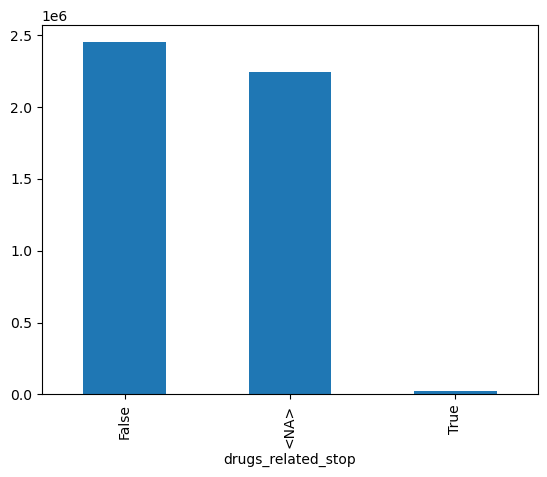

In [30]:
IL['drugs_related_stop'].value_counts(dropna=False).plot(kind='bar')

Due to the large proportion and number of NA values, I will leave the column as is. If the column is deleted or the rows with missing values are deleted, lots of information will be lost and if values are imputed, it will introduce bias.

##### stop_duration

The last column that has a large percentage of missing values is stop_duration. In order to address this, let's look at the distribution of this variable for all non-missing values.

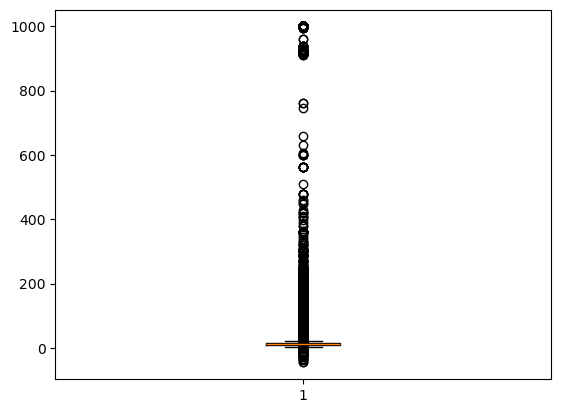

In [31]:
plt.boxplot(IL['stop_duration'].dropna())
plt.show()

This boxplot has revealed that most stop durations lie relatively close to 0. At the same time, this column contains invalid and extreme values. There are many outliers that stretch all the way up to 999 which is why the boxplot is compressed at the bottom. In addition, there are negative values included in the plot which should not exist for a duration variable, though these negative values are not as extreme as the higher-end outliers.

In addition to dealing with the missing values, we need to also address outliers in this column.

Since the boxplot is extremely compressed due to all the extreme values, let's calculate the descriptive statistics in order to understand the distribution of most values in this column.

In [32]:
IL['stop_duration'].describe()

count    3429003.0
mean     15.118566
std      15.820771
min          -45.0
25%           10.0
50%           13.0
75%           15.0
max          999.0
Name: stop_duration, dtype: Float64

The column's descriptive statistics reveals that the 25th, 50th, and 75th percentiles are 10.0, 13.0, and 15.0 respectively. Meaning that the middle 50% of values lie between the small range of 10 and 15, which is why the boxplot above was so compressed. Although not explicitly stated, after looking at the distribution of values, we can assume that this stop_duration is in minutes as it is the only unit that makes sense.

Let's look at the distribution of the non-outlier values:

In [33]:
#calculating IQR and upper and lower bounds
IQR = IL['stop_duration'].quantile(0.75) - IL['stop_duration'].quantile(0.25)
upper = IL['stop_duration'].quantile(0.75) + (IQR*1.5)
lower = IL['stop_duration'].quantile(0.25) - (IQR*1.5)

In [34]:
#defining a new variable that contains only stop durations that are within the upper and lower bounds
stop = IL['stop_duration'].copy()
stop_duration_no_outliers = stop[(stop <= upper) & (stop >= lower)]

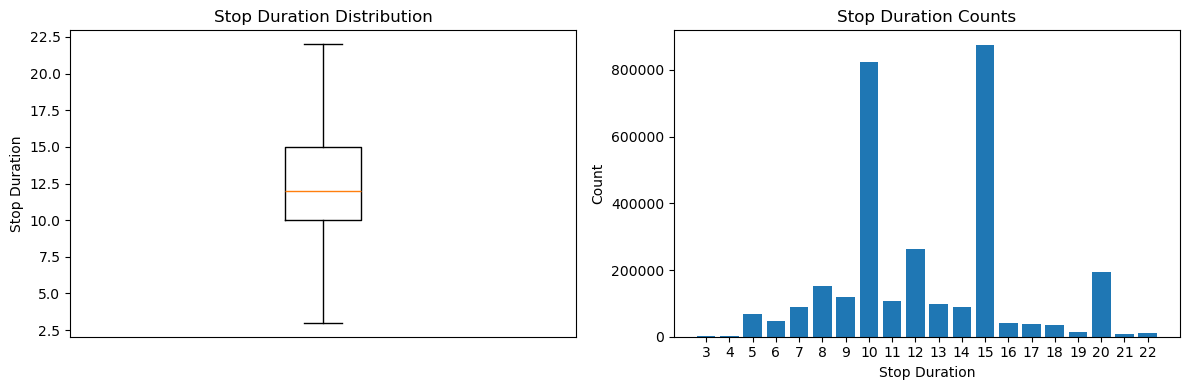

In [35]:
counts = stop_duration_no_outliers.value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(stop_duration_no_outliers, vert=True)
axes[0].set_xticks([])
axes[0].set_title("Stop Duration Distribution")
axes[0].set_ylabel("Stop Duration")

axes[1].bar(counts.index, counts.values)
axes[1].set_xticks(range(int(counts.index.min()), int(counts.index.max()) + 1))
axes[1].set_title("Stop Duration Counts")
axes[1].set_xlabel("Stop Duration")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Note: This barplot reflects only non-outlier stop durations, so the visualization represents typical stop durations.

The boxplot reveals that most values lie between 2.5 and 22.5, with the median time being about 12 minutes and the IQR being about 10 to 15. We can see that out of all typical stops, half fall within a tight 5 minute window of 10 to 15 minutes. We can also see the distribution is slightly right-skewed meaning that these traffic stops tend to be on the shorter side.

The barplot reveals that stop_duration is a discrete variable with a multimodal distribution who has two large peaks at 10 and 15 minutes (all of which is not seen in the boxplot). These values may be default or preset options in the reportng system, or may be the result of police officers rounding the duration of their traffic stops which an instance of heaping. Aside from these large peaks, there are smaller, noticable peaks at 8, 12, and 20 minutes while very few stops fall below 5 or above 20 minutes. This can be due to the nature of routine traffic stops, where it takes about 5-20 minutes to run the plates, write the report, and issue warnings/citations and where stops under 5 minutes or over 20 minutes are uncommon. 

For now, I will keep the stop_duration column as is. After further data cleaning, I will come back and fix it.

##### Removing Unnecessary Columns

In [36]:
IL.head()

,id,state,stop_date,stop_time,location_raw,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,17,Illinois State Police,F,1963,41,Caucasian,White,"Moving Violation,Speed",Speeding,False,No Search,False,Written Warning,<NA>,Olds 2000,<NA>,ILLINOIS STATE POLICE 17
1,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,07,Illinois State Police,M,1987,17,Caucasian,White,"Moving Violation,Traffic Sign or Signal",Safe movement,False,No Search,False,Written Warning,<NA>,Linc 1990,<NA>,ILLINOIS STATE POLICE 07
2,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,11,Illinois State Police,M,1981,23,Caucasian,White,"Moving Violation,Speed",Speeding,False,No Search,False,Citation,<NA>,Chev 1996,<NA>,ILLINOIS STATE POLICE 11
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,03,Illinois State Police,F,1972,32,African American,Black,"Moving Violation,Other",Moving violation,False,No Search,False,Citation,<NA>,Buic 1992,<NA>,ILLINOIS STATE POLICE 03
4,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,09,Illinois State Police,F,1980,24,African American,Black,"Moving Violation,Other",Moving violation,False,No Search,False,Citation,<NA>,Olds 1996,<NA>,ILLINOIS STATE POLICE 09


In [37]:
IL.nunique()

id                       4715031
state                          1
stop_date                   4382
stop_time                   1440
location_raw                  24
fine_grained_location         24
police_department              1
driver_gender                  2
driver_age_raw               102
driver_age                    85
driver_race_raw                7
driver_race                    5
violation_raw                 13
violation                      8
search_conducted               2
search_type_raw               11
contraband_found               2
stop_outcome                   3
stop_duration                340
vehicle_type               29255
drugs_related_stop             2
district                      24
dtype: int64

I will remove the following columns:
- id -- doesn't provide us with valuable information
- state -- dataset only contains information from one state (IL) therefore unnecessary
- police_department -- only one police department in this dataset (Illinois State Police) therefore column is unnecessary

In [38]:
IL = IL.drop(['id', 'state', 'police_department'], axis = 1)

In addition, the location_raw, fine_grained_location, and district columns seem to be reporting the same information, but to confirm this:

In [39]:
(IL[IL['location_raw'] != IL['district']]).head()

,stop_date,stop_time,location_raw,fine_grained_location,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,stop_duration,vehicle_type,drugs_related_stop,district
1307179,2007-01-20,03:10,NaN,NaN,F,1984,23,African American,Black,"Equipment,NA",Equipment,False,No Search,False,Written Warning,10,Chry 1995,<NA>,NaN
1469626,2007-05-23,09:40,NaN,NaN,F,1964,43,Caucasian,White,"Moving Violation,Speed",Speeding,False,No Search,False,Citation,7,Dodg 2005,<NA>,NaN
1477650,2007-05-26,07:15,NaN,NaN,M,1966,41,Caucasian,White,"Equipment,NA",Equipment,False,No Search,False,Written Warning,10,Bmw 2007,<NA>,NaN
3484008,2012-01-17,13:34,NaN,NaN,M,1971,41,Caucasian,White,"Commercial Vehicle,Not applicable",Other,False,No Search,False,Verbal Warning,3,Vovlvo 2000,False,NaN
3508589,2012-02-11,23:07,NaN,NaN,M,1995,17,Caucasian,White,"Moving Violation,Speed",Speeding,False,No Search,False,Verbal Warning,6,Chevrolet 2003,False,NaN


In [40]:
(IL[IL['location_raw'] != IL['district']]).isnull().sum()

stop_date                  0
stop_time                  0
location_raw             266
fine_grained_location    266
driver_gender              0
driver_age_raw             0
driver_age                 0
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw            0
contraband_found           0
stop_outcome               0
stop_duration              0
vehicle_type               0
drugs_related_stop         3
district                 266
dtype: int64

location_raw and district are the same for all but 266 rows but all of those are NaN values.

In [41]:
(IL[IL['district'].str[-2:]!=IL['fine_grained_location']]).head()

,stop_date,stop_time,location_raw,fine_grained_location,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,stop_duration,vehicle_type,drugs_related_stop,district
1307179,2007-01-20,03:10,NaN,NaN,F,1984,23,African American,Black,"Equipment,NA",Equipment,False,No Search,False,Written Warning,10,Chry 1995,<NA>,NaN
1469626,2007-05-23,09:40,NaN,NaN,F,1964,43,Caucasian,White,"Moving Violation,Speed",Speeding,False,No Search,False,Citation,7,Dodg 2005,<NA>,NaN
1477650,2007-05-26,07:15,NaN,NaN,M,1966,41,Caucasian,White,"Equipment,NA",Equipment,False,No Search,False,Written Warning,10,Bmw 2007,<NA>,NaN
3484008,2012-01-17,13:34,NaN,NaN,M,1971,41,Caucasian,White,"Commercial Vehicle,Not applicable",Other,False,No Search,False,Verbal Warning,3,Vovlvo 2000,False,NaN
3508589,2012-02-11,23:07,NaN,NaN,M,1995,17,Caucasian,White,"Moving Violation,Speed",Speeding,False,No Search,False,Verbal Warning,6,Chevrolet 2003,False,NaN


In [42]:
(IL[IL['district'].str[-2:]!=IL['fine_grained_location']]).isnull().sum()

stop_date                  0
stop_time                  0
location_raw             266
fine_grained_location    266
driver_gender              0
driver_age_raw             0
driver_age                 0
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw            0
contraband_found           0
stop_outcome               0
stop_duration              0
vehicle_type               0
drugs_related_stop         3
district                 266
dtype: int64

fine_grained_location and district report the same information. For this reason, I will only keep one of these three columns in the dataset.

In [43]:
IL = IL.drop(['district', 'location_raw'], axis = 1)

To both focus on the bigger picture and for simpler visualizations, which is important for a dataset as large as this one, I will remove the driver_race_raw and violation_raw columns and use the cleaned ones provided by Stanford in the original dataset.

In [44]:
IL = IL.drop(['driver_race_raw', 'violation_raw'], axis = 1)

Since driver_age_raw and driver_age report the same information, I will the driver_age_raw column, as that one is less intuitive.

In [45]:
IL = IL.drop('driver_age_raw', axis = 1)

Since the vehicle_type column doesn't contribute to any of the research questions, it will be removed since it offers no interpretive value.

In [46]:
IL = IL.drop('vehicle_type', axis = 1)

Let's explore the search columns:

In [47]:
IL[IL['search_conducted'] == True]['search_type_raw'].value_counts()

search_type_raw
Incident to Arrest               60930
Unknown                          35883
Consent                          30248
Custodial Arrest                 28602
Probable Cause                   21390
Reasonable Suspicion              4843
Other                             4130
Drug Dog Alert                    2313
Consent Search Request Denied      250
Consent Denied                     139
No Search                            0
Name: count, dtype: int64

In [48]:
IL[IL['search_conducted'] == False]['search_type_raw'].value_counts()

search_type_raw
No Search                        4526303
Consent                                0
Consent Denied                         0
Consent Search Request Denied          0
Custodial Arrest                       0
Drug Dog Alert                         0
Incident to Arrest                     0
Other                                  0
Probable Cause                         0
Reasonable Suspicion                   0
Unknown                                0
Name: count, dtype: int64

Since search_conducted and search_type_raw contain redundant information (where 'No Search' indicates search_conducted = False and the remaining categories indicate search_conducted = True), I will remove the search_conducted column.

In [49]:
IL = IL.drop('search_conducted', axis = 1)

##### Feature Engineering

In order to facilitate analysis, let's extract useful features such as the hour from stop_time, and year and month from stop_date.

In [50]:
IL['hour'] = IL['stop_time'].str.slice(0, 2).astype('Int64')
IL['year'] = IL['stop_date'].dt.year.astype('Int64')
IL['month'] = IL['stop_date'].dt.month.astype('Int64')
IL['day_of_week'] = IL['stop_date'].dt.dayofweek

##### Renaming Columns

In [51]:
IL.rename(columns={'fine_grained_location': 'district', 'search_type_raw': 'search_type', 'vehicle_type': 'vehicle_make'}, inplace=True)

In [52]:
IL.head()

,stop_date,stop_time,district,driver_gender,driver_age,driver_race,violation,search_type,contraband_found,stop_outcome,stop_duration,drugs_related_stop,hour,year,month,day_of_week
0,2004-01-01,00:02,17,F,41,White,Speeding,No Search,False,Written Warning,<NA>,<NA>,0,2004,1,3
1,2004-01-01,00:07,07,M,17,White,Safe movement,No Search,False,Written Warning,<NA>,<NA>,0,2004,1,3
2,2004-01-01,00:14,11,M,23,White,Speeding,No Search,False,Citation,<NA>,<NA>,0,2004,1,3
3,2004-01-01,00:15,03,F,32,Black,Moving violation,No Search,False,Citation,<NA>,<NA>,0,2004,1,3
4,2004-01-01,00:15,09,F,24,Black,Moving violation,No Search,False,Citation,<NA>,<NA>,0,2004,1,3


##### Dealing with Outliers and Invalid Values

Lastly, before performing EDA, let's deal with outliers and invalid values, which we know are definitely present in stop_duration.

In [53]:
IL.describe()

,stop_date,driver_age,stop_duration,hour,year,month,day_of_week
count,4715031,4712099.0,3429003.0,4712700.0,4715031.0,4715031.0,4.715031e+06
mean,2009-07-10 07:50:33.355327232,36.098135,15.118566,12.476557,2009.027382,6.476507,3.047529e+00
min,2004-01-01 00:00:00,15.0,-45.0,0.0,2004.0,1.0,0.000000e+00
25%,2006-10-04 00:00:00,24.0,10.0,8.0,2006.0,4.0,1.000000e+00
50%,2009-04-24 00:00:00,33.0,13.0,13.0,2009.0,6.0,3.000000e+00
75%,2012-03-12 00:00:00,46.0,15.0,17.0,2012.0,9.0,5.000000e+00
max,2015-12-31 00:00:00,99.0,999.0,23.0,2015.0,12.0,6.000000e+00
std,NaN,13.833682,15.820771,6.431597,3.296494,3.299865,1.970127e+00


Looking at the descriptive statistics, we can note the following:
- stop_date ranges from the beginning of 2004 to the end of 2015 (no invalid values present)
- driver_age ranges from 15 to 99... there are no invalid values
- stop_duration has many missing values along with invalid and extreme values which we already know are outliers but may or may not be data errors
- hour, year, and month have no invalid values


While excluding the date/time columns, and since we already explored stop_duration, let's look for outliers in the driver_age column.

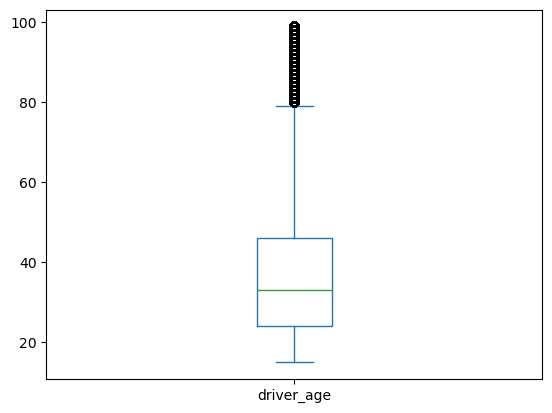

In [54]:
IL['driver_age'].plot(kind = 'box')
plt.show()

Although there are outliers present in the driver_age column, these values are valid and expected in a dataset of this size. Therefore we will leave them as is.

Let's examine the distribution of stop_duration values for the central mass of the data.

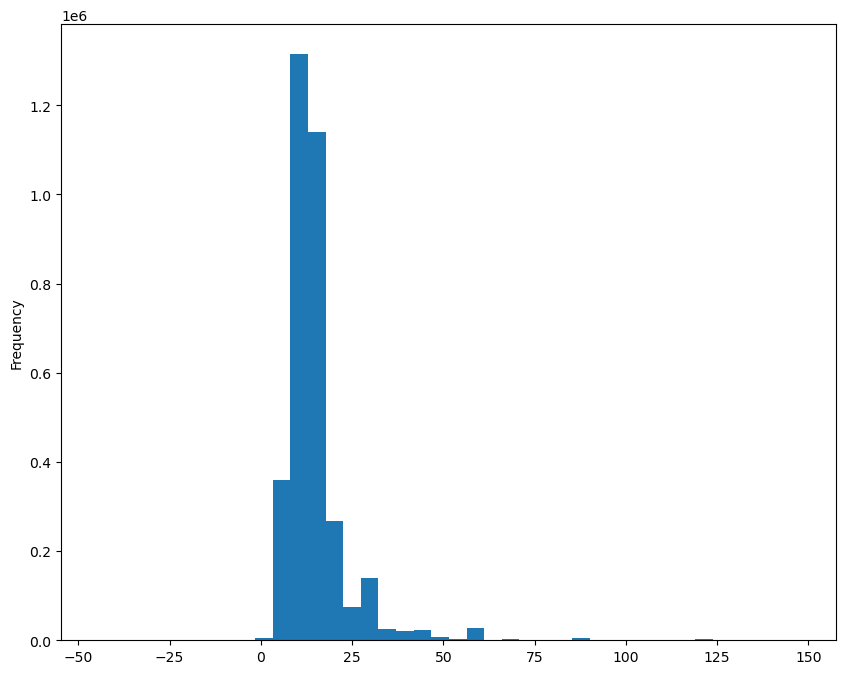

In [55]:
plt.figure(figsize = (10,8))
IL[IL['stop_duration']<150]['stop_duration'].plot(kind = 'hist', bins = 40)
plt.show()

A large proportion of the data (the majority) lies between 0 and about 75 with very few stop_durations exceeding 100. Based on this distribution, a good cutoff for invalid values seems to be 120.

In order to deal with invalid and extreme values in the stop_duration column, let's take a look at what features typically influence stop duration.

In [56]:
outlier_mask = ((IL['stop_duration']>60) | (IL['stop_duration']<lower))

IL_nonoutlier = IL.loc[~outlier_mask]

In [57]:
IL.head()

,stop_date,stop_time,district,driver_gender,driver_age,driver_race,violation,search_type,contraband_found,stop_outcome,stop_duration,drugs_related_stop,hour,year,month,day_of_week
0,2004-01-01,00:02,17,F,41,White,Speeding,No Search,False,Written Warning,<NA>,<NA>,0,2004,1,3
1,2004-01-01,00:07,07,M,17,White,Safe movement,No Search,False,Written Warning,<NA>,<NA>,0,2004,1,3
2,2004-01-01,00:14,11,M,23,White,Speeding,No Search,False,Citation,<NA>,<NA>,0,2004,1,3
3,2004-01-01,00:15,03,F,32,Black,Moving violation,No Search,False,Citation,<NA>,<NA>,0,2004,1,3
4,2004-01-01,00:15,09,F,24,Black,Moving violation,No Search,False,Citation,<NA>,<NA>,0,2004,1,3


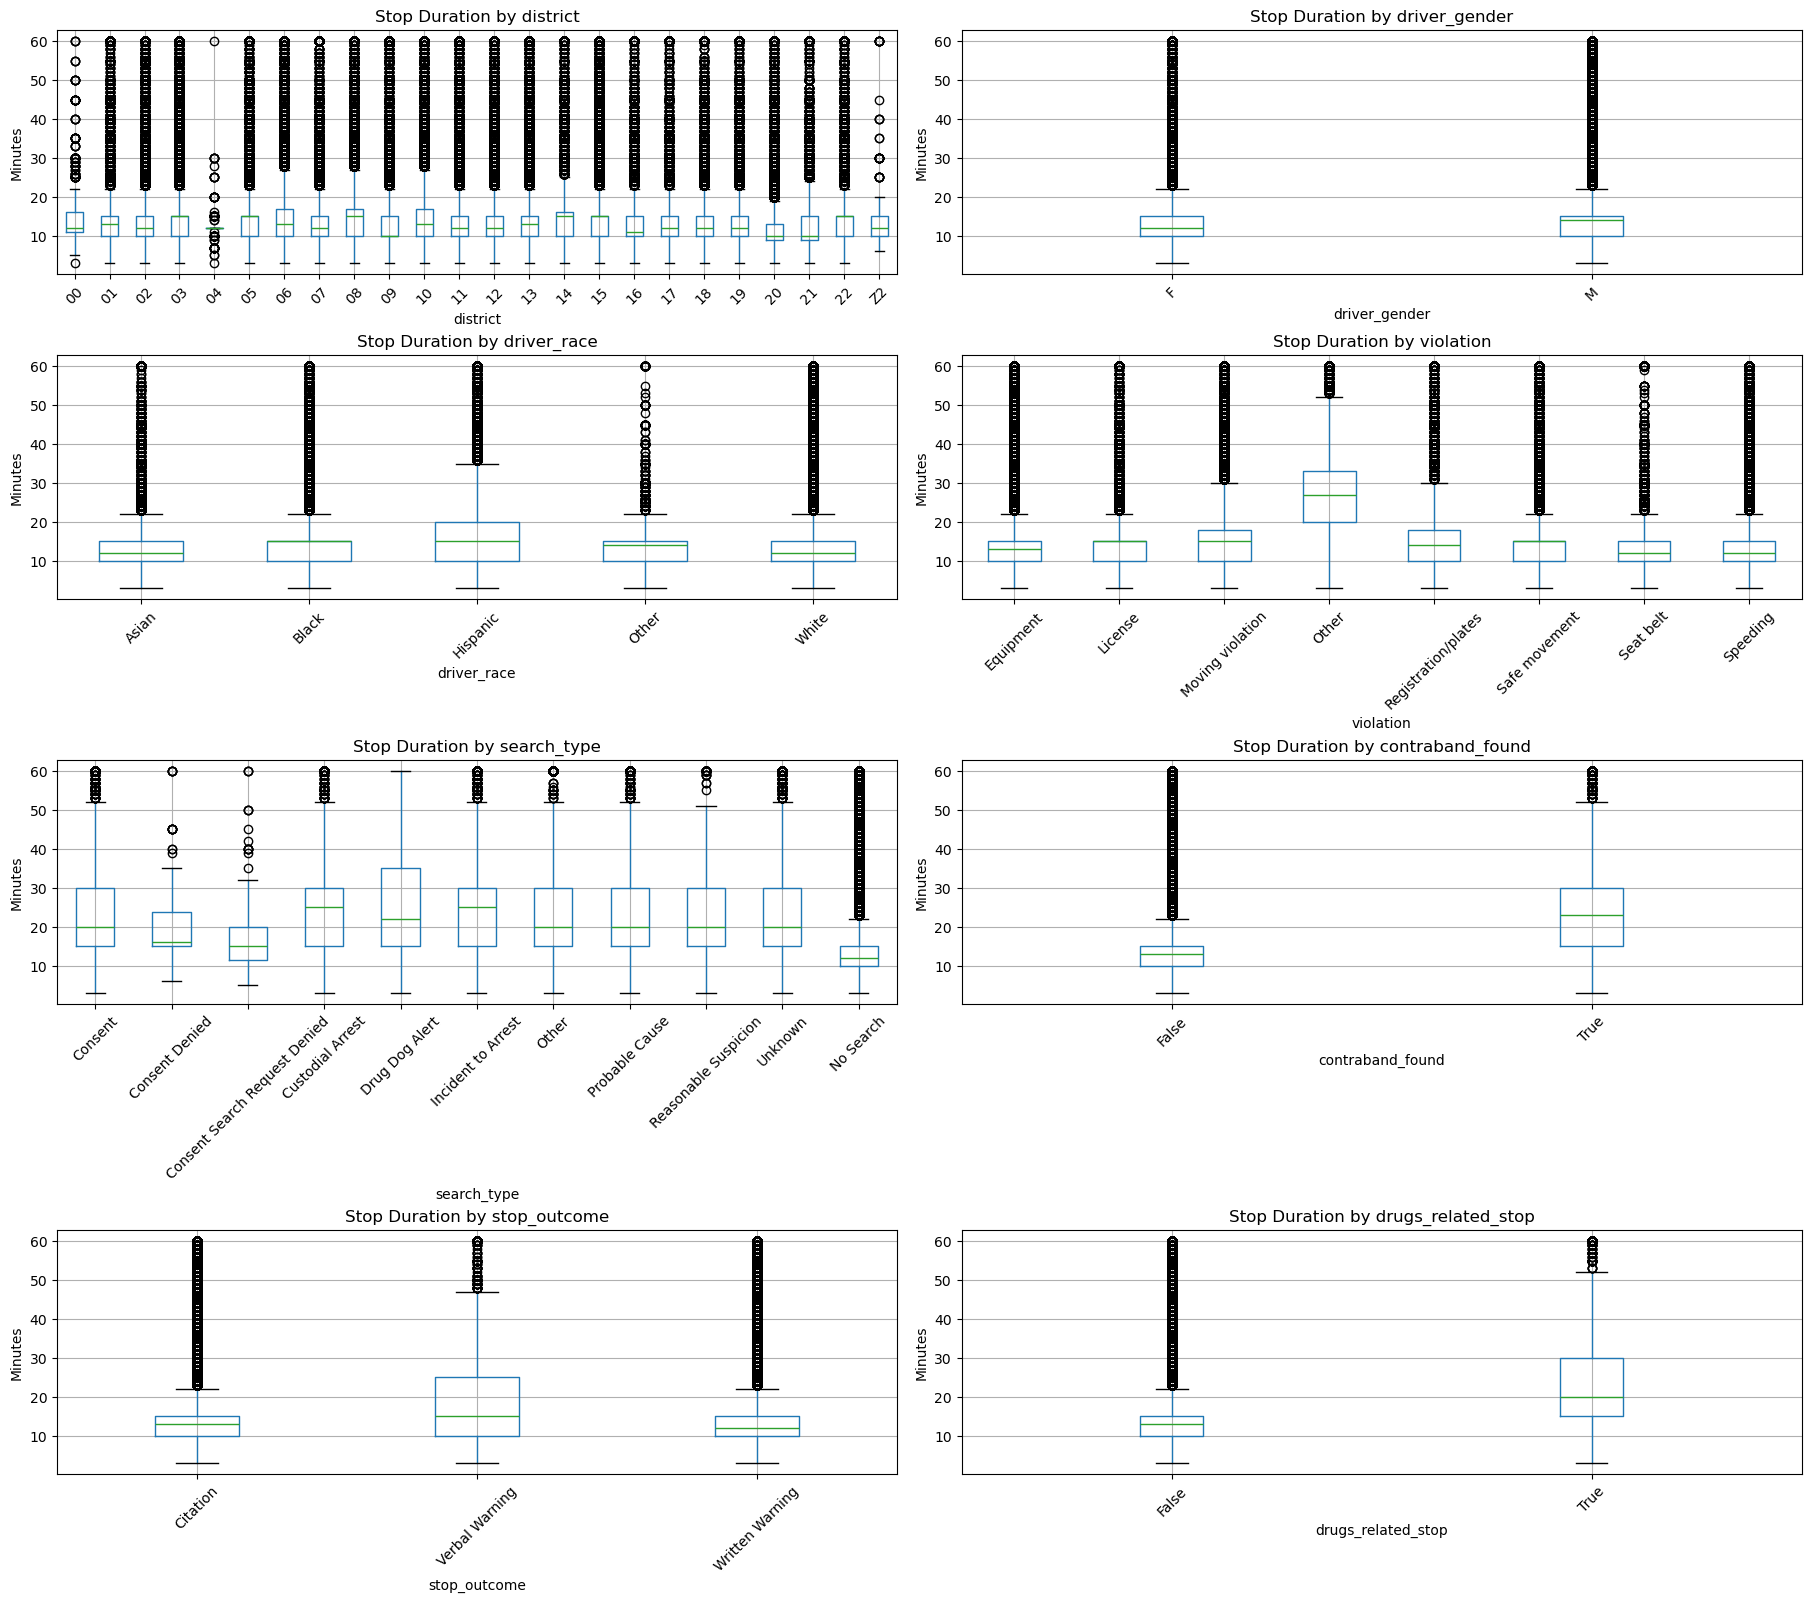

In [98]:
cat_cols = ['district', 'driver_gender', 'driver_race', 'violation', 'search_type', 'contraband_found', 
            'stop_outcome', 'drugs_related_stop']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 16), constrained_layout = True)
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    IL_nonoutlier.boxplot(column='stop_duration', by=col, ax=ax)
    ax.set_title(f'Stop Duration by {col}')
    ax.set_ylabel('Minutes')
    ax.tick_params(axis='x', rotation=45)

fig.suptitle('')
plt.show()

Looking at the boxplots above, there are 4 categorical features that seem to be correlated to stop_duration which are violation, search_type, contraband_found, and drugs_related_stop.

Let's look at the numeric features.

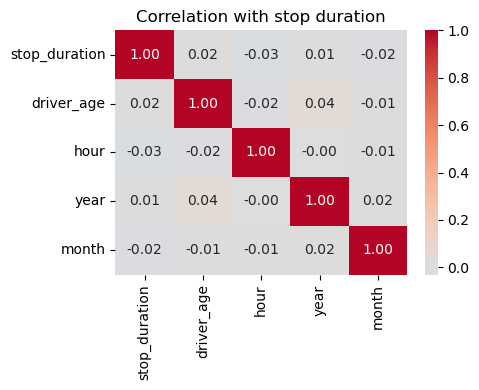

In [59]:
cols = ['stop_duration', 'driver_age', 'hour', 'year', 'month']

heat_df = IL[cols].dropna()
corr = heat_df.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation with stop duration')
plt.tight_layout()
plt.show()

Looking at this heatmap, there is no correlation between driver_age, hour, year, or month to stop_duration.

Let's clean up the stop_duration column:

I will treat stop durations that are <1 or >120 as invalid. These invalid values will be imputed using the median stop duration of observations with the same violation, search type, contraband found indicator, and drug related stop indicator. For cases where there are no comparable observations, I will use the global median stop duration. As values are being corrected and imputed, I will preserve the original stop duration values and create a new column for imputed values.

In [60]:
high_cutoff = 120
low_cutoff = 1

invalid_mask = ((IL['stop_duration'] < low_cutoff) | (IL['stop_duration'] > high_cutoff))

IL['stop_duration_imputed'] = IL['stop_duration'].astype('float64')

valid = IL.loc[~invalid_mask]

group_cols = ['violation', 'search_type', 'contraband_found', 'drugs_related_stop']

group_medians = (valid.groupby(group_cols)['stop_duration'].median())

IL.loc[invalid_mask, 'stop_duration_imputed'] = (IL.loc[invalid_mask].set_index(group_cols)
                                                 .index.map(group_medians))

still_missing = IL['stop_duration_imputed'].isna()

global_median = valid['stop_duration'].median()

IL.loc[still_missing, 'stop_duration_imputed'] = global_median

IL['stop_duration_imputed'] = IL['stop_duration_imputed'].astype('Int64')

In [61]:
IL[['stop_duration', 'stop_duration_imputed']].describe()

,stop_duration,stop_duration_imputed
count,3429003.0,4715031.0
mean,15.118566,14.357965
std,15.820771,8.253399
min,-45.0,1.0
25%,10.0,10.0
50%,13.0,13.0
75%,15.0,15.0
max,999.0,120.0


Imputing these values changed the distribution of the variable in a few ways. There are no longer missing values and the min and max changed from -45 to 1 and 999 to 120 respectively. In addition, mean decreased by a little less than one minute (from 15.12 to 14.36) which is expected as we removed many extreme values. Standard deviation also decreased from 15.82 to 8.25 which is also expected since we decreased the spread of the data by removing values that were too low and too high. The middle 50% of the data was not changed by this imputation as seen since the 25th, 50th, and 75th percentile values are the same for stop_duration and stop_duration_imputed.

Let's look at the distribution of each of these variables now.

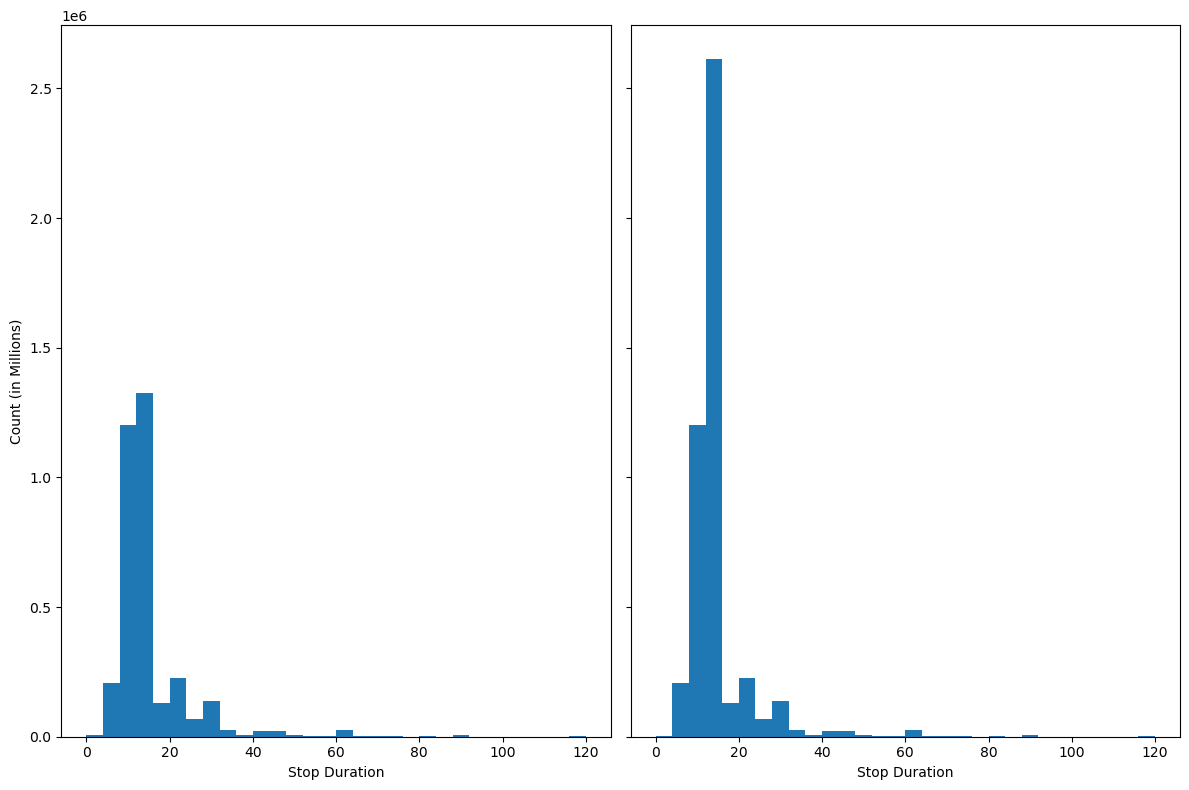

In [62]:
fig, ax = plt.subplots(1,2, figsize = (12, 8), sharey = True)

bins = np.linspace(0, 120, 31)

IL[(IL['stop_duration']>=0) & (IL['stop_duration']<=120)]['stop_duration'].plot(kind='hist', bins=bins, ax=ax[0])
ax[0].set_xlabel('Stop Duration')
ax[0].set_ylabel('Count (in Millions)')

IL['stop_duration_imputed'].plot(kind='hist', bins=bins, ax=ax[1])
ax[1].set_xlabel('Stop Duration')

plt.tight_layout()
plt.show()

Looking at the distribution of these two columns (before and after imputation), we can see that the majority of the invalid/extreme values were imputed to be between 12 and 16 minutes as that bar increases drastically 

### Overall (High Level) EDA 

Before answering the questions posed at the beginning of the project, let's look at the dataset overall to better understand it.

#### Number of Traffic Stops per Year in IL

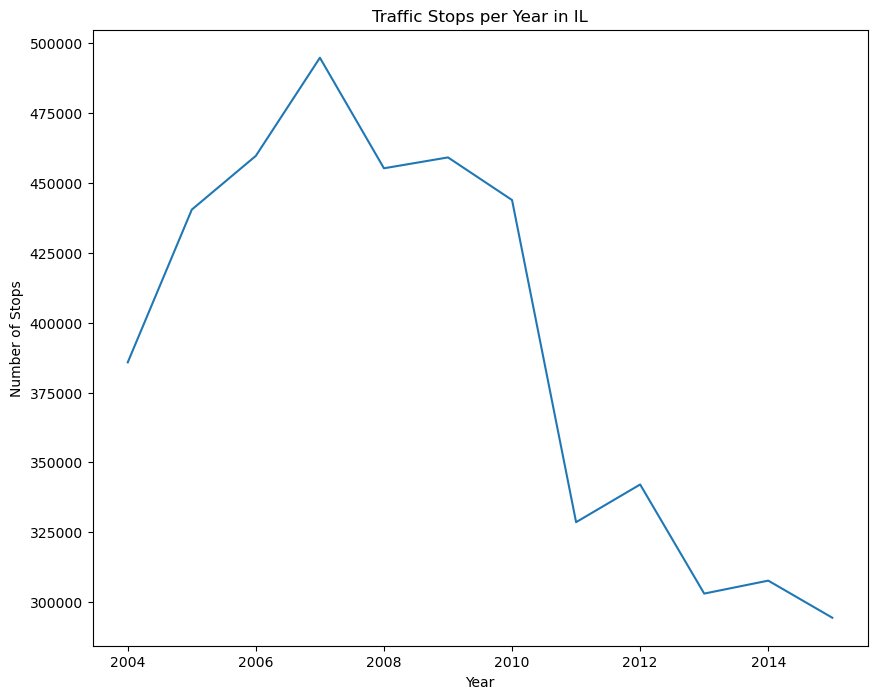

In [63]:
stops_per_year = IL['stop_date'].dt.year.value_counts().sort_index()

plt.figure(figsize = (10,8))
plt.plot(stops_per_year.index, stops_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.title('Traffic Stops per Year in IL')
plt.show()

Based on this visualization we can see:
- There was a rise of traffic stops from about 385,000 stops in 2004 to almost 500,000 in 2007 where it hit its peak
    - This can be due to larger officer staffing levels or stronger traffic enforcement during that period
- A downwards trend in the number of traffic stops is seen from 2008 onwards, stabilizing to around 300,000 stops by 2013
    - Can be due to budget cuts or departments prioritizing violent crimes instead of traffic stops

#### Number of Traffic Stops per Month in IL

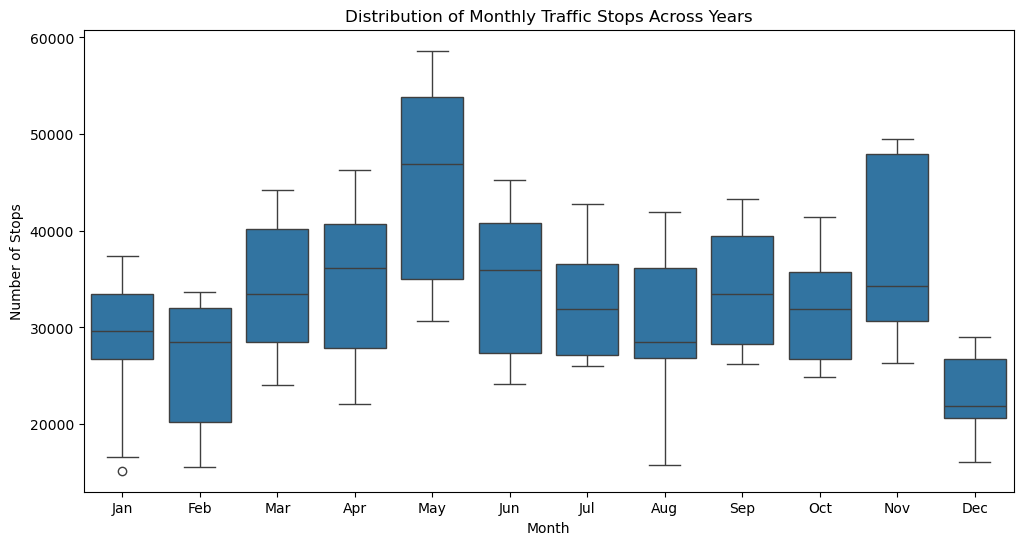

In [64]:
monthly_counts = (IL.groupby([IL['stop_date'].dt.year.rename('year'),IL['stop_date'].dt.month.rename('month')])
    .size().reset_index(name='count'))

monthly_counts['month_name'] = monthly_counts['month'].map(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_counts, x='month_name', y='count')
plt.title('Distribution of Monthly Traffic Stops Across Years')
plt.xlabel('Month')
plt.ylabel('Number of Stops')
plt.show()

Monthly Boxplot Insights:
- The winter months (December, January, and February) consistently have fewer stops, with December having the lowest median
    - Possibly because of less driving in the winter months (possibly also due to reduced daylight hours) or possibly less enforcement in the winter months
- One low end outlier is seen in the data in January (year unknown)
- May has the highest median, with a wide spread, indicating significant year-to-year variation
    - consistent with higher traffic volumes as weather gets warmer and traffic increases, therefore is a period of high police demand
- August holds a low median but a wide spread
    - although there is a dip in traffic stops, it is less predictable and therefore police demand can fluctuate
- The remaining months have a relatively steady/predictable traffic stop rate

#### Number of Traffic Stops by Hour of Day

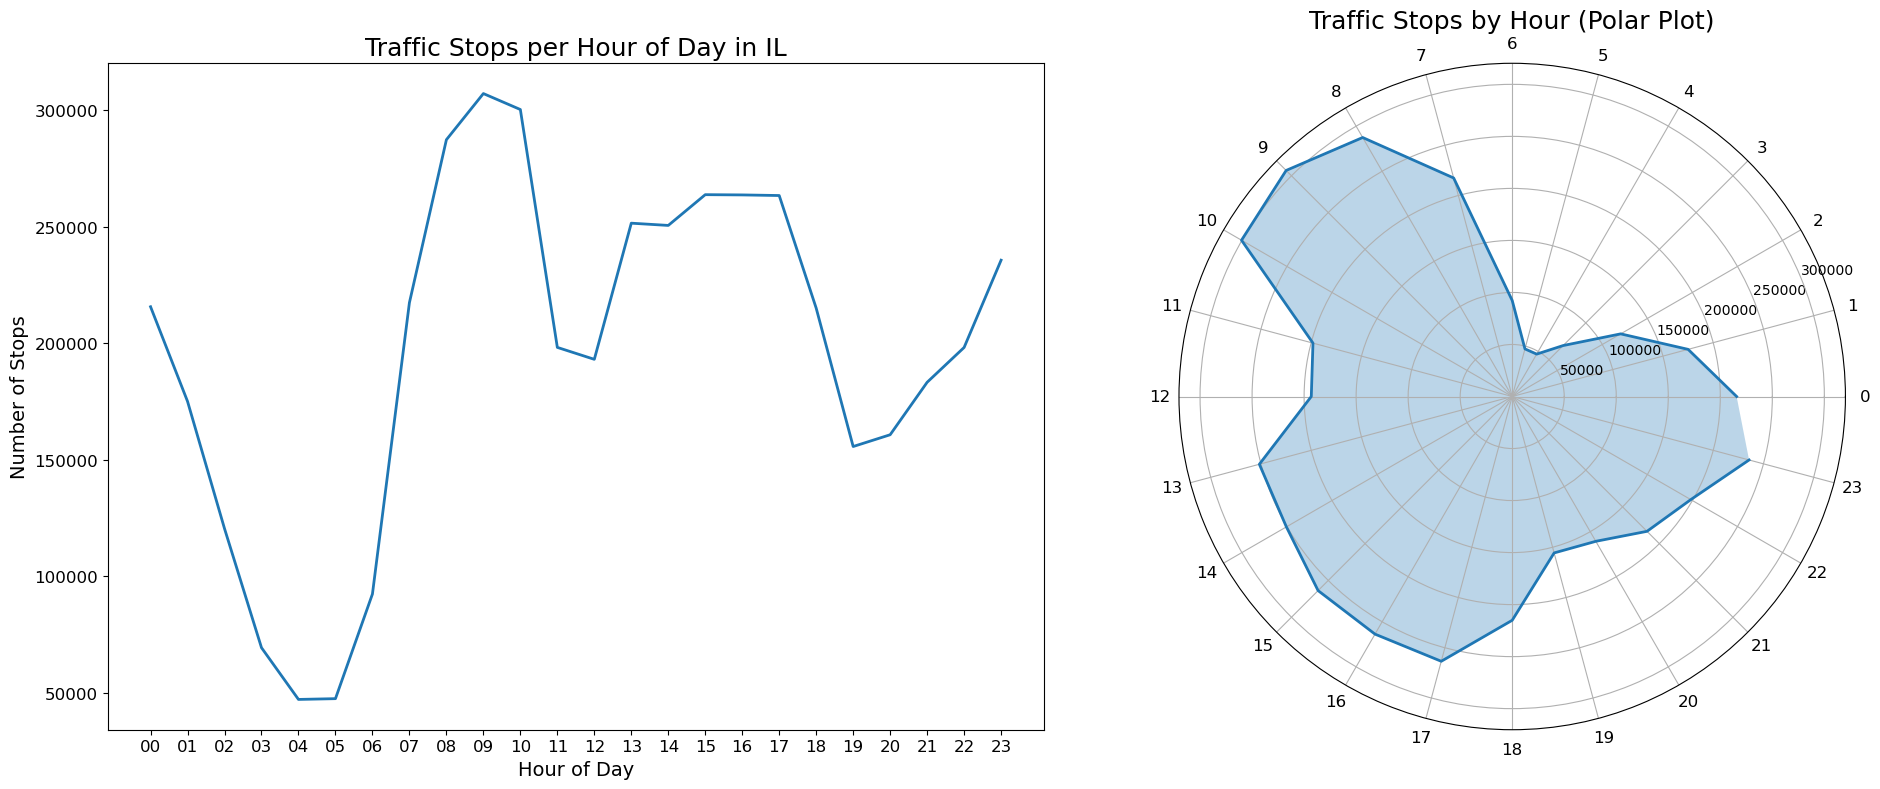

In [65]:
stops_per_hour = IL['stop_time'].str[:2].value_counts().sort_index()
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
values = stops_per_hour.values

fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(1, 2, 1)   # row 1, col 1
ax1.plot(stops_per_hour.index, stops_per_hour.values, linewidth=2)
ax1.set_xlabel('Hour of Day', fontsize=14)
ax1.set_ylabel('Number of Stops', fontsize=14)
ax1.set_title('Traffic Stops per Hour of Day in IL', fontsize=18)
ax1.tick_params(labelsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='polar')   # row 1, col 2 with polar projection
ax2.plot(theta, values, linewidth=2)
ax2.fill(theta, values, alpha=0.3)
ax2.set_xticks(theta)
ax2.set_xticklabels(range(24), fontsize=12)
ax2.set_title("Traffic Stops by Hour (Polar Plot)", fontsize=18)

plt.tight_layout()
plt.show()

(Polar plot helps show the daily cycle better but is less intuitive)

Number of Traffic Stops by Hour of Day Analysis:
- The lowest volume of traffic stops occurs between 2AM and 6AM, with the lowest point between 4AM and 5AM.
    - Consistent with when roads are the quietest since it's dark outside and most people are asleep
- Traffic stops hit their peak between 8AM and 10AM, where it hits over 300,000 trraffic stops
    - Likely tied to the morning rush hour, where road volume spikes as everyone is getting to work/school
- Stops slightly dip at between 10AM and 12PM but rise again around 1-5PM
    - Consistent with steady daytime traveling, with a higher concentration of traffic stops as evening rush hour hits
- There is a noticable drop after 5PM which steadily rises again and hits its peak close to midnight
    - May reflect nightlife traffic, including DUI watch, or proactive stops

#### Traffic Stops by District

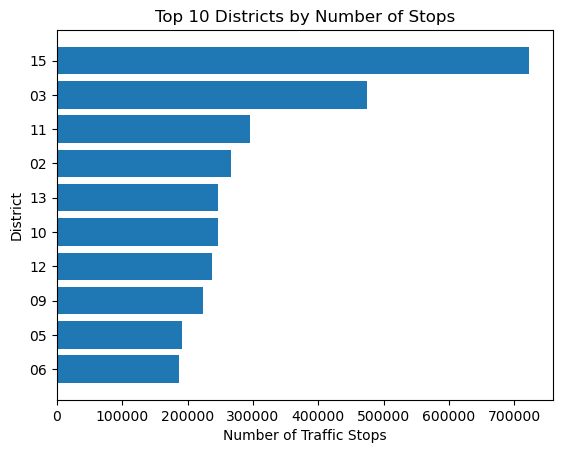

In [66]:
stops_by_district = IL['district'].value_counts().head(10).sort_values()

plt.barh(stops_by_district.index, stops_by_district.values)
plt.xlabel('Number of Traffic Stops')
plt.ylabel('District')
plt.title('Top 10 Districts by Number of Stops')
plt.show()

Top 10 Districts by Number of Stops Insights:
- Districts 15 and 03 have the highest number of traffic stops with over 700,000 and 450,000 stops respectively
    - Could be larger districts and therefore more stops are expected
- The remaining districts on the visualization have relatively similar number of traffic stops (around 250,000)

#### Violations by Year

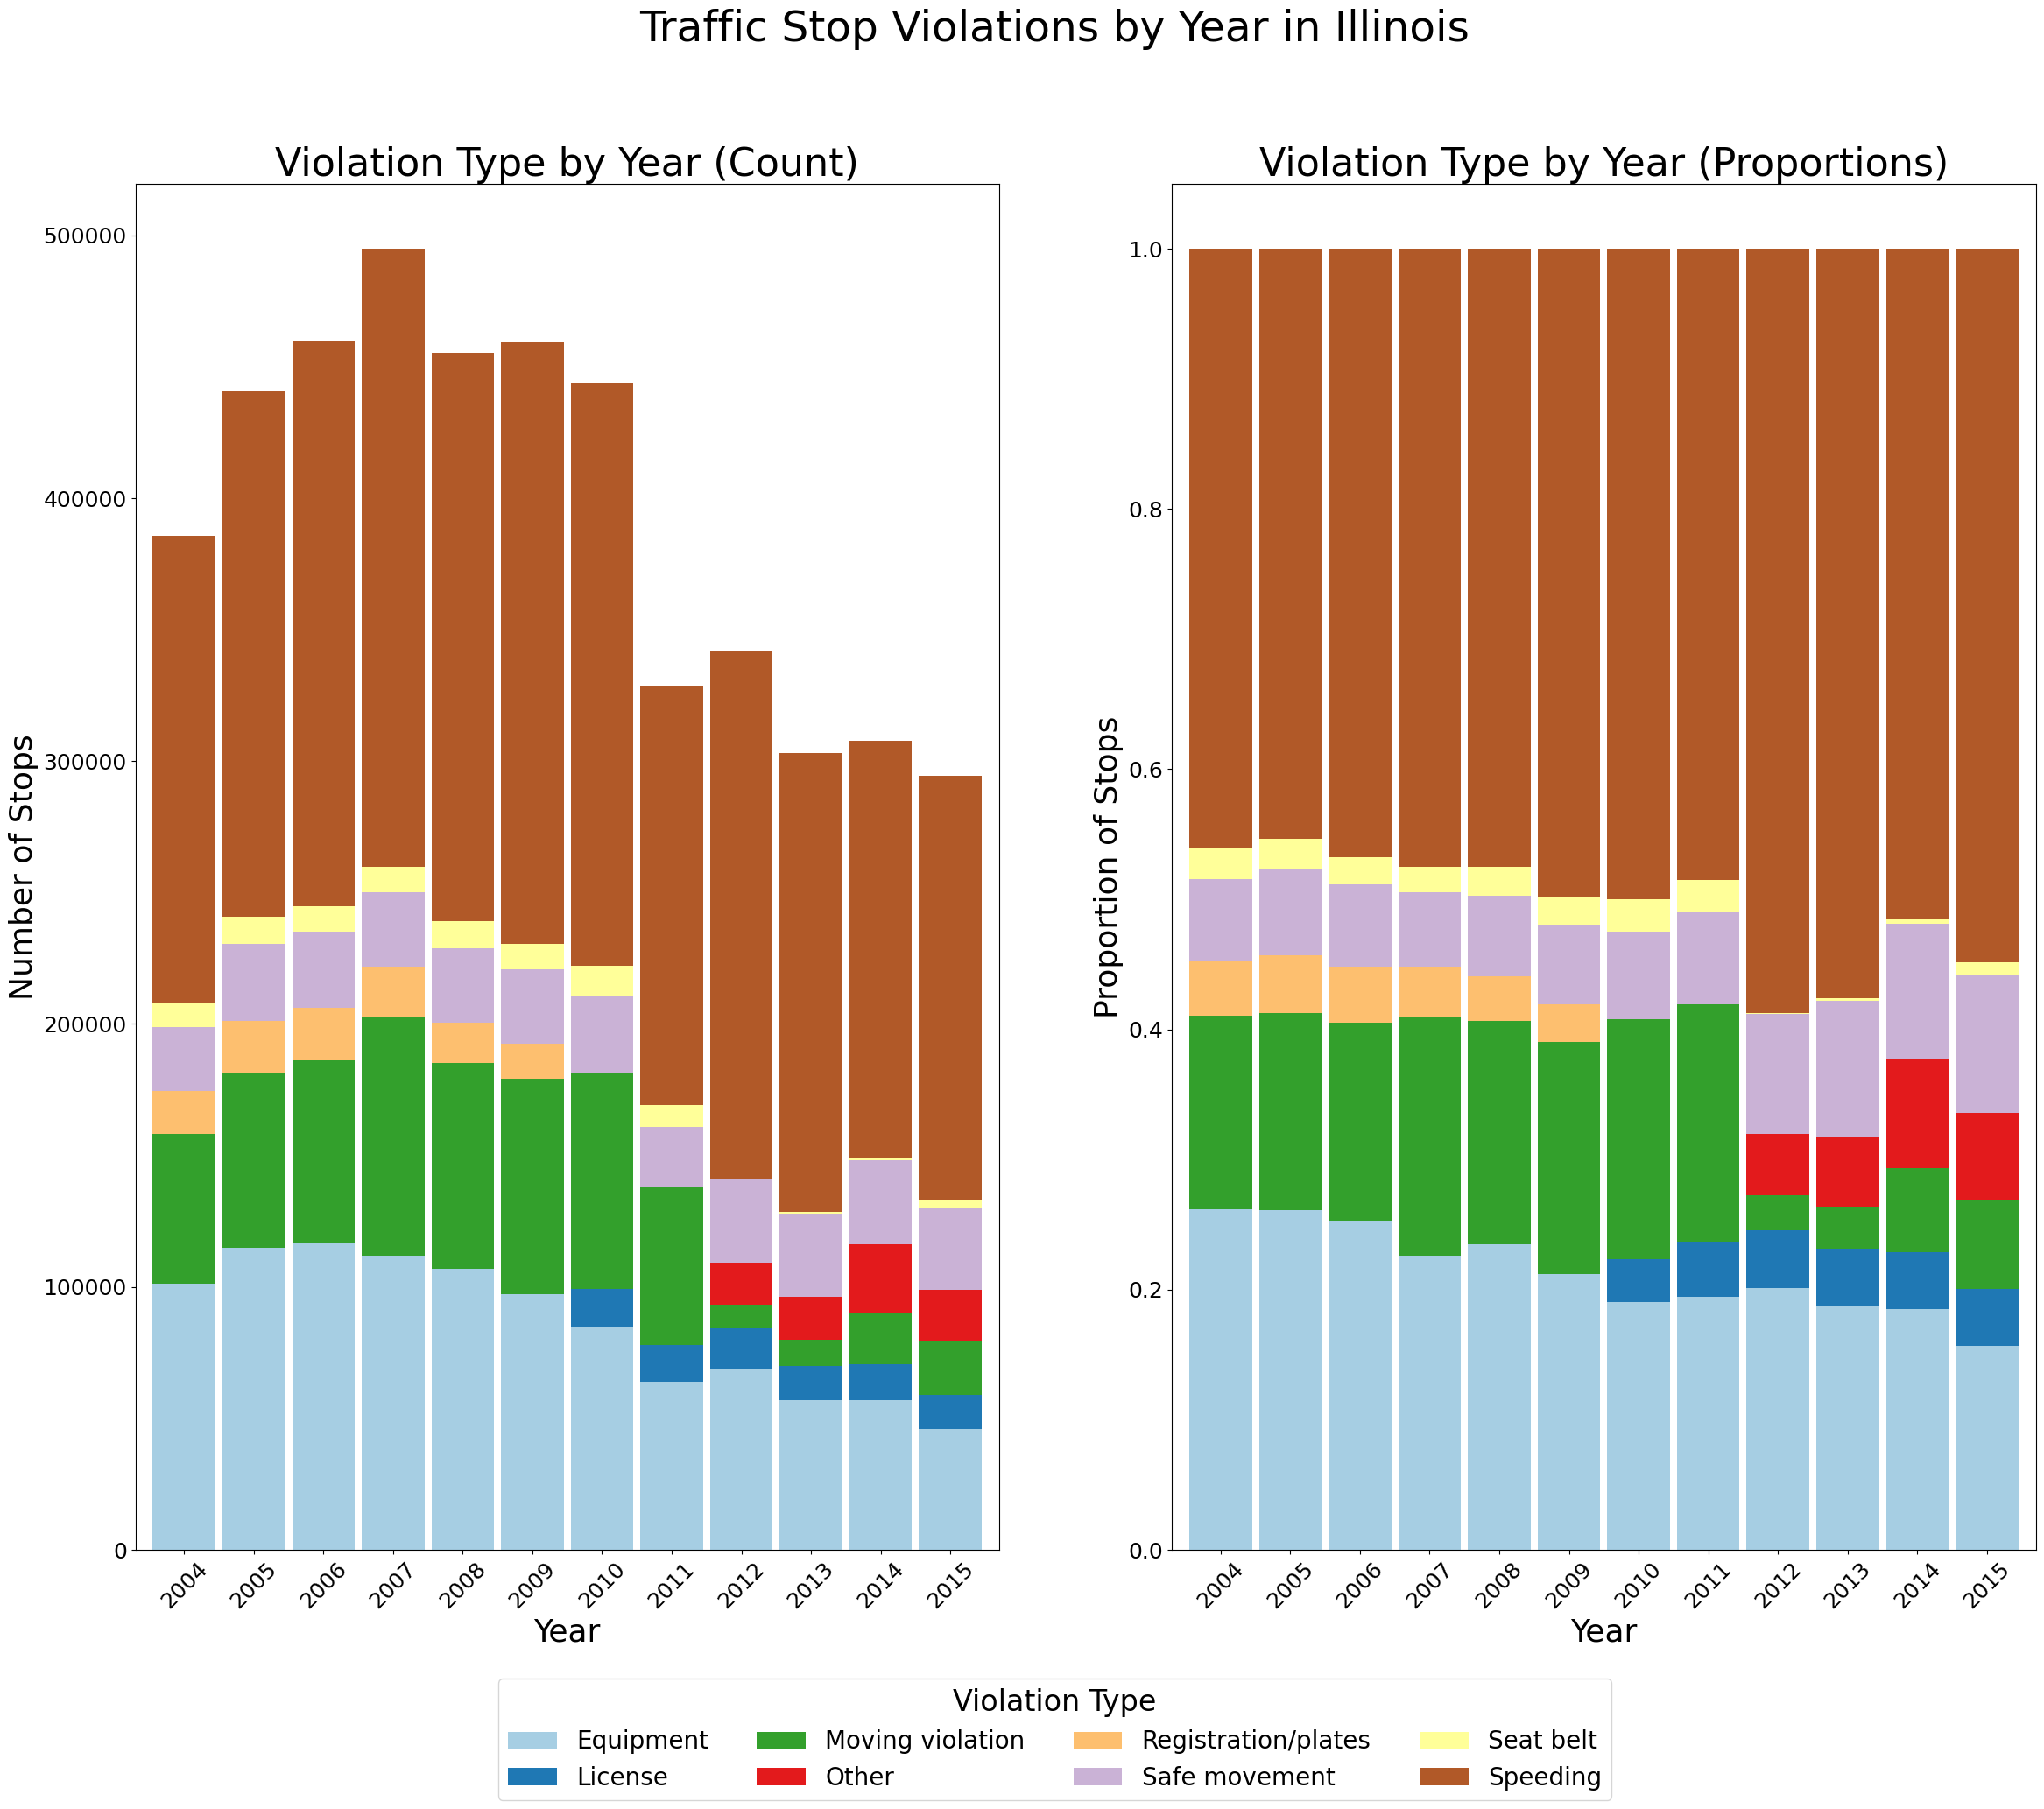

In [115]:
year_violation_counts = (IL.groupby([IL['stop_date'].dt.year.rename('year'), IL['violation'].rename('violation')])
                         .size().reset_index(name = 'count'))
pivot_violation = year_violation_counts.pivot(index = 'year', columns = 'violation', values = 'count').fillna(0)
proportions_violation = pivot_violation.div(pivot_violation.sum(axis = 1), axis = 0)

fig, axes = plt.subplots(1, 2, figsize=(28, 20))
fig.suptitle('Traffic Stop Violations by Year in Illinois', fontsize = 35)

pivot_violation.plot(kind="bar", stacked=True, ax=axes[0], width=0.9, colormap='Paired')
axes[0].set_title("Violation Type by Year (Count)", fontsize=32)
axes[0].set_ylabel("Number of Stops", fontsize=26)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_xlabel("Year", fontsize=26)
axes[0].tick_params(axis='x', labelsize=18, labelrotation=45)
axes[0].legend_.remove()

proportions_violation.plot(kind="bar", stacked=True, ax=axes[1], width=0.9, colormap='Paired')
axes[1].set_title("Violation Type by Year (Proportions)", fontsize=32)
axes[1].set_ylabel("Proportion of Stops", fontsize=26)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].set_xlabel("Year", fontsize=26)
axes[1].tick_params(axis='x', labelsize=18, labelrotation=45)
axes[1].legend_.remove()

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Violation Type", bbox_to_anchor=(0.5, -0.05), loc="lower center", fontsize=20, title_fontsize=24, ncol = 4)

plt.subplots_adjust(bottom=0.1)
plt.savefig("traffic_violations.png", dpi=150, bbox_inches="tight")
plt.show()

Violation Type by Year Insights:
- As seen before, the number of traffic stops increases, hitting a peak at 2007, then a significant decrease is seen at the start of 2011
- A major shift in the relative proportions of violations is seen starting at 2012
    - The police force seem to be more focused on speeding and safe movement while being less focused on seat belts, moving violations and equipment
        - May reflect changes in driver behavior, reporting practices, policy changes or enforcement patterns
        - The increased proportion of speeding and safe movement violations after 2011 could possibly suggest either a shift toward focusing on higher risk safety stops or a data recoding, although this cannot be confirmed from the data alone
    - An "other" category is added at this point as well
        - Suggests a coding or reporting change in how violations are classified
- Between the years of 2004 and 2009, there are violations categorized under "Registration/Plates" while there are none under "License", then between the years of 2010 and 2015, there are no violations categorized under "Registration/Plates" while there are violations under "License"
    - There appears to be a naming/classification shift where violations previously reported under "Registration/Plates" are now reported under "License" starting in 2010 (possibly a system change)


A large data shift occurs in 2011-2012. This could be due to several factors including changes in data systems, enforcement priorities, policy adjustments, staffing levels, or oprganizational restructuring within the police force. However, the exact cause cannot be determined from the dataset alone.

#### Traffic Stop Violations by Gender

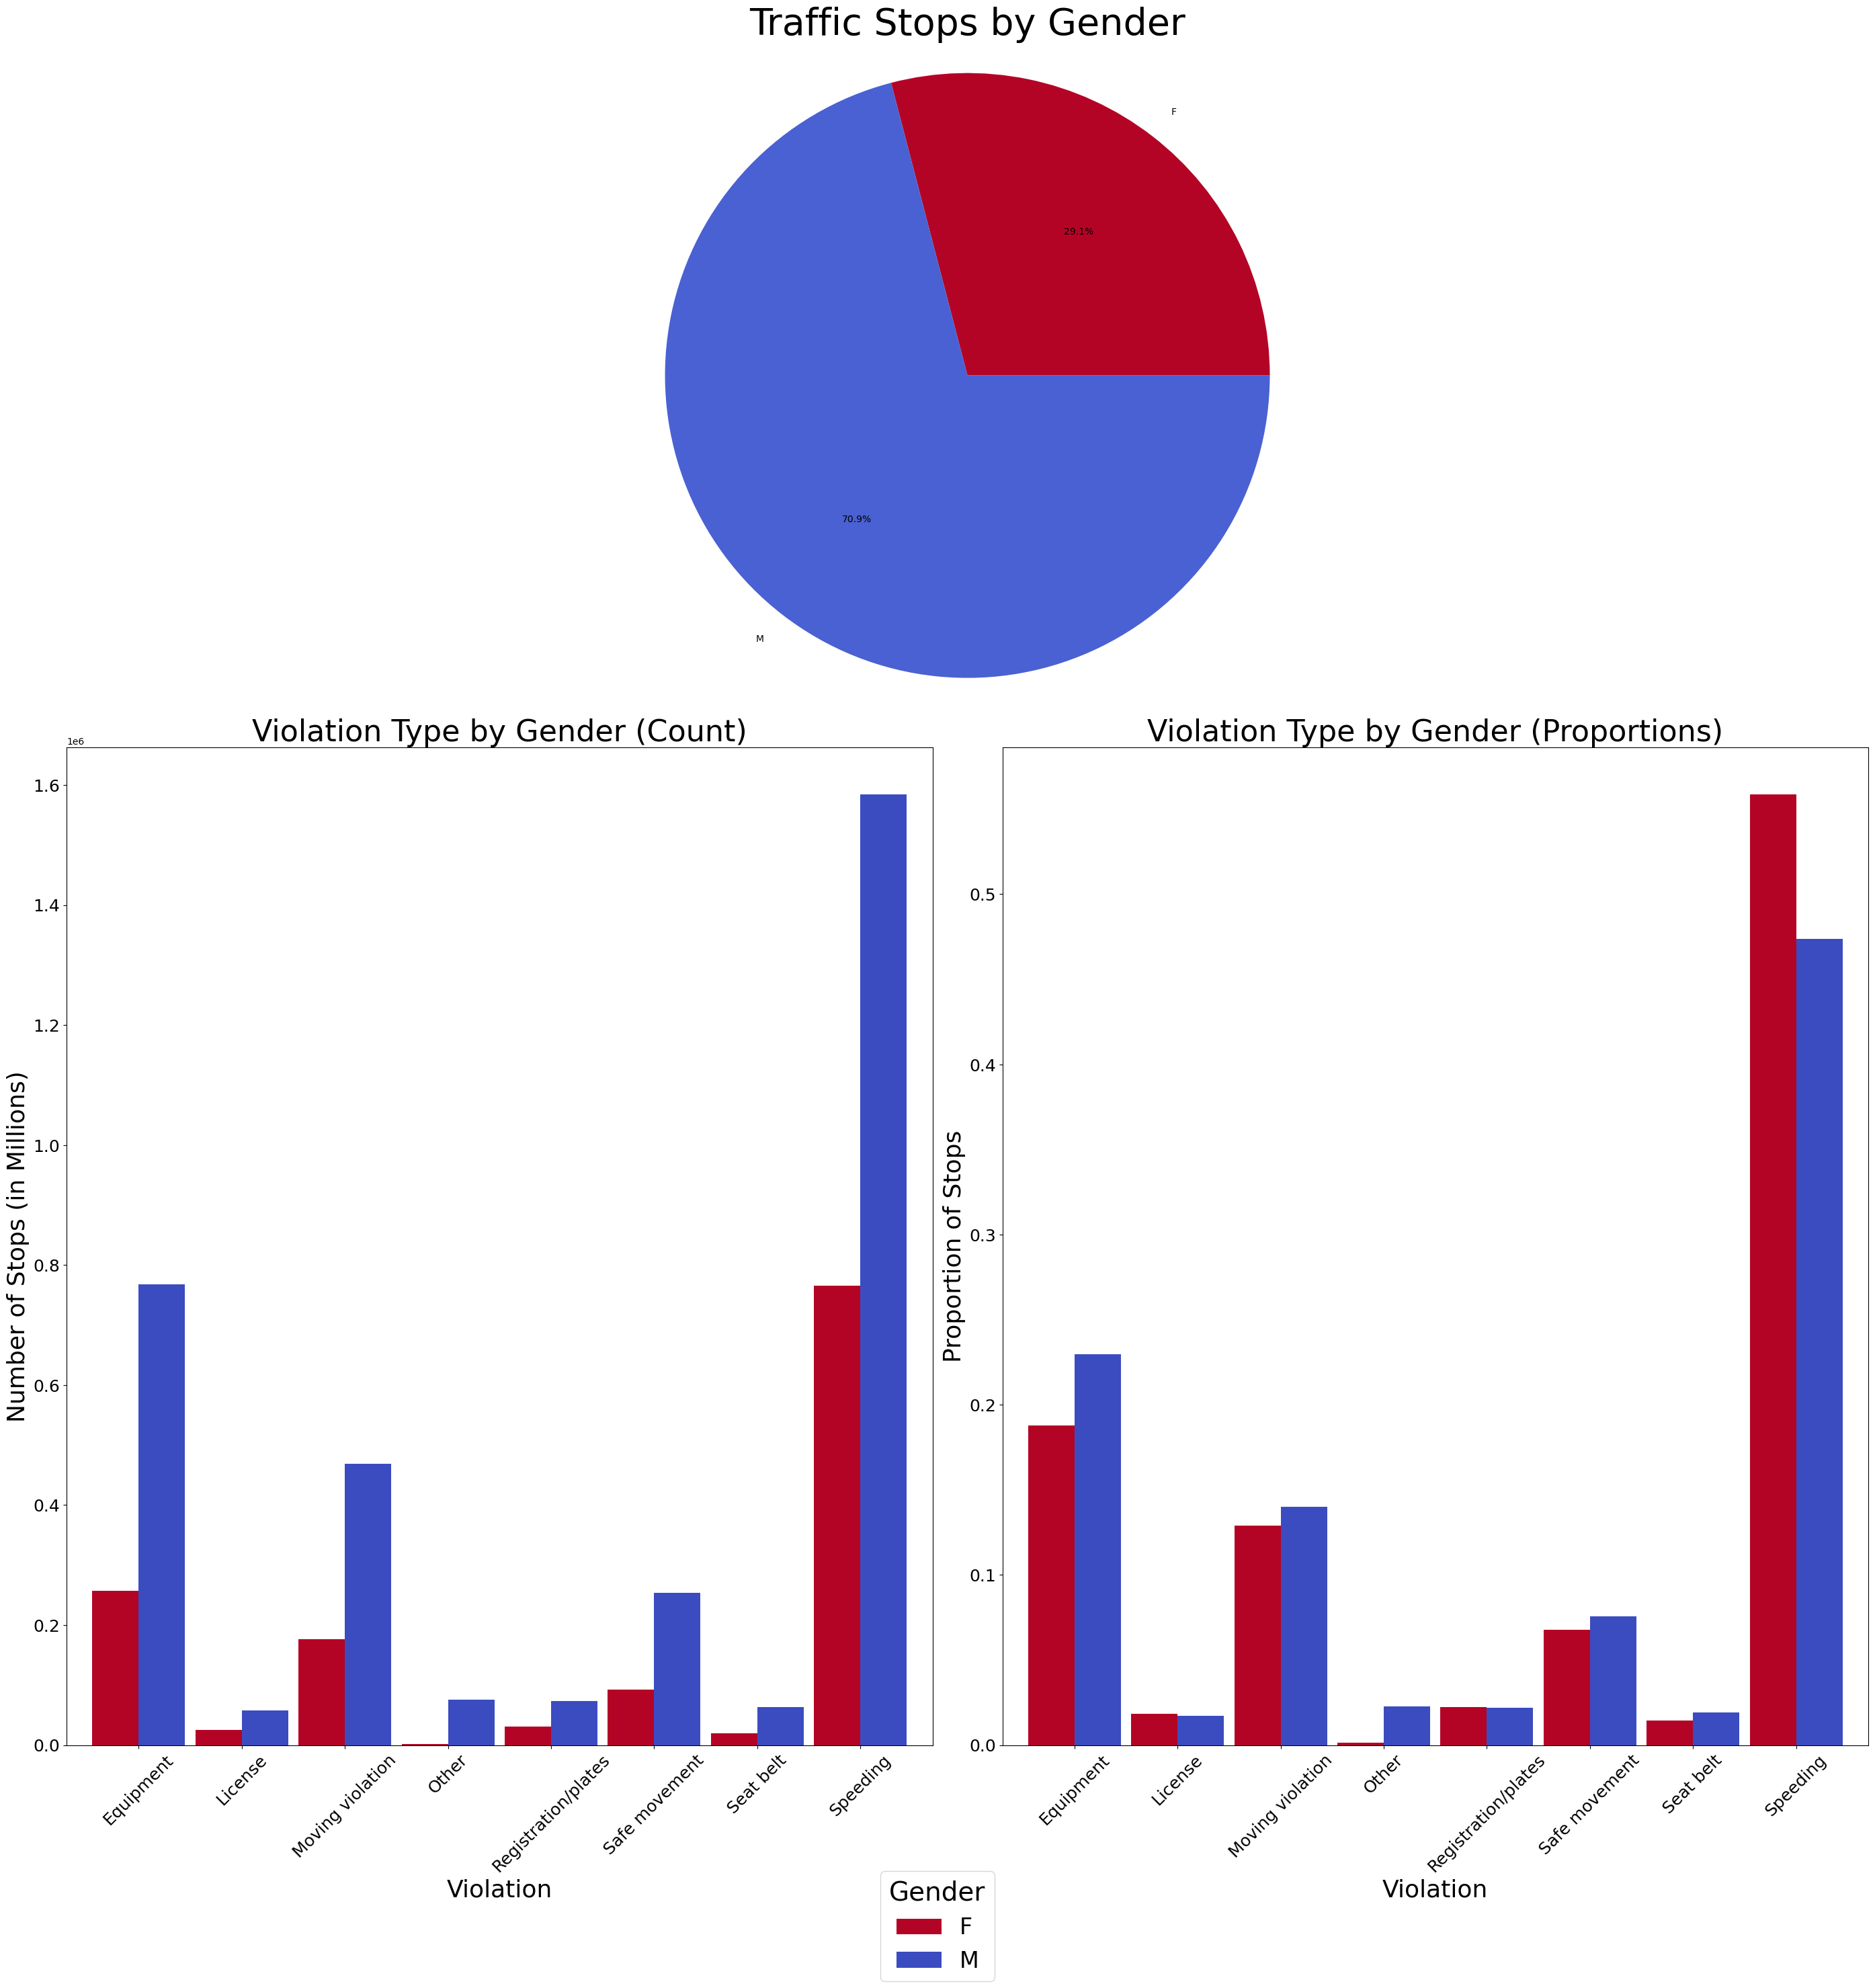

In [69]:
stops_by_gender = IL.groupby('driver_gender').size().reset_index(name='count')
cmap = cm.get_cmap('coolwarm_r')
colors = cmap([0, 0.95])

fig = plt.figure(figsize=(28, 30))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 3])

ax_pie = fig.add_subplot(gs[0, :])

ax_pie.pie(stops_by_gender['count'], labels=stops_by_gender['driver_gender'], colors=colors, autopct='%1.1f%%')
ax_pie.set_title("Traffic Stops by Gender", fontsize=40)
ax_pie.axis('equal')

violations_by_gender = (IL.groupby(['driver_gender', 'violation']).size().reset_index(name = 'count'))
pivot_violations_by_gender = violations_by_gender.pivot(index = 'violation', columns = 'driver_gender', values = 'count')
proportions_violations_by_gender = pivot_violations_by_gender.div(pivot_violations_by_gender.sum(axis = 0), axis = 1)

ax1 = fig.add_subplot(gs[1, 0])
pivot_violations_by_gender.plot(kind="bar", ax=ax1, width=0.9, colormap='coolwarm_r')

ax1.set_title("Violation Type by Gender (Count)", fontsize=32)
ax1.set_ylabel("Number of Stops (in Millions)", fontsize=26)
ax1.set_xlabel("Violation", fontsize=26)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18, labelrotation=45)
ax1.legend_.remove()

ax2 = fig.add_subplot(gs[1, 1])
proportions_violations_by_gender.plot(kind="bar", ax=ax2, width=0.9, colormap='coolwarm_r')

ax2.set_title("Violation Type by Gender (Proportions)", fontsize=32)
ax2.set_ylabel("Proportion of Stops", fontsize=26)
ax2.set_xlabel("Violation", fontsize=26)
ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18, labelrotation=45)
ax2.legend_.remove()

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, title="Gender", bbox_to_anchor=(0.5, 0.01), loc="lower center", fontsize=24, title_fontsize=28)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

Violations by Gender Insights:
- In this dataset, male drivers accounted for over 70% of traffic stops
    - Likely reflects differences in driving behavior
- Speeding is the top violation for both genders but especially for women
- Men are more frequently cited for equipment violations compared to women
    - May reflect differences in vehicle age and maintenance and driving patterns
- Men are more frequently cited for moving violations and safe movement compared to women

In this dataset, male drivers account for most of the traffic stops reported and are seen exhibiting a broader range of violation types while female driver violations are more concentrated in speeding.

#### Stop Outcome by Gender

In [70]:
outcome_by_gender = (IL.groupby(['driver_gender', 'stop_outcome']).size().reset_index(name = 'count'))

pivot_gender = outcome_by_gender.pivot(index = 'stop_outcome', columns = 'driver_gender', values = 'count')

pivot_gender_props = pivot_gender.div(pivot_gender.sum(axis = 0), axis = 1)

order = ['Verbal Warning', 'Written Warning', 'Citation']

pivot_gender_props = pivot_gender_props.reindex(order)

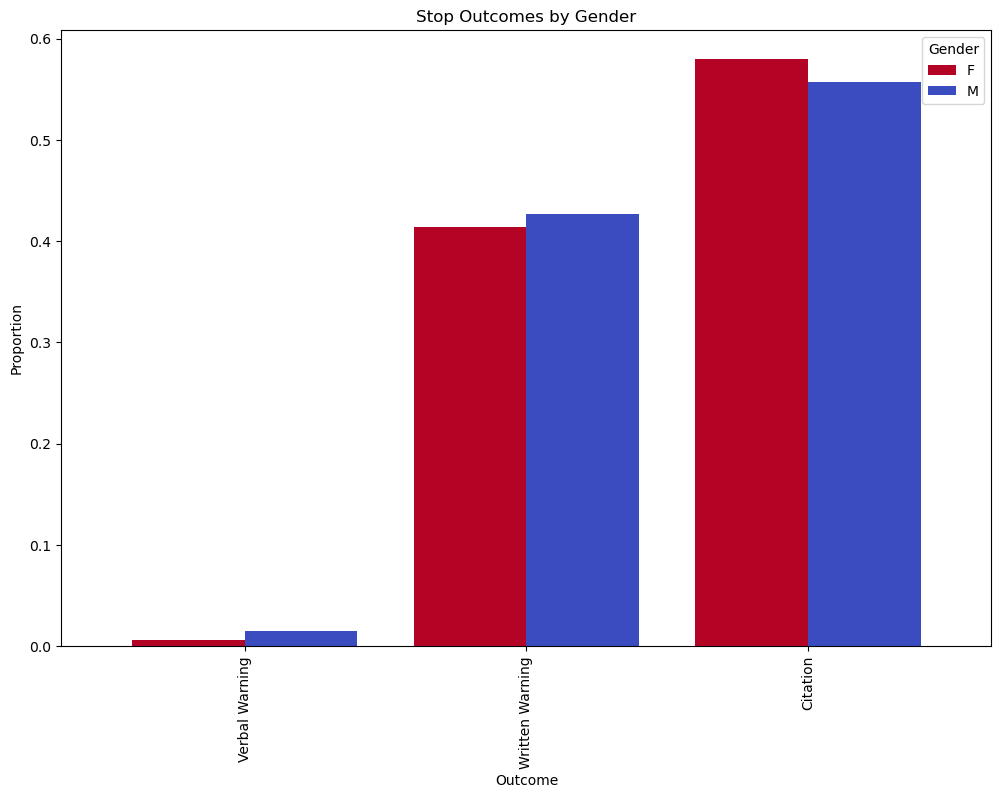

In [71]:
pivot_gender_props.plot(kind = 'bar', figsize = (12,8), width = 0.8, colormap = 'coolwarm_r')
plt.title('Stop Outcomes by Gender')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.legend(title = 'Gender')
plt.show()

Outcome by Gender Insights:
- In this dataset, women have a slightly higher proportion of stops that result in a citation compared to men (F = 0.58 vs M = 0.56)
- In this dataset, men are more likely than women to receive both verbal and written warnings
    - Suggests that men tend to receive more lenient outcomes compared to women in this dataset
    
Note: This might not be a statistically significant difference... statistical tests needed to confirm

#### Violations by Age Group

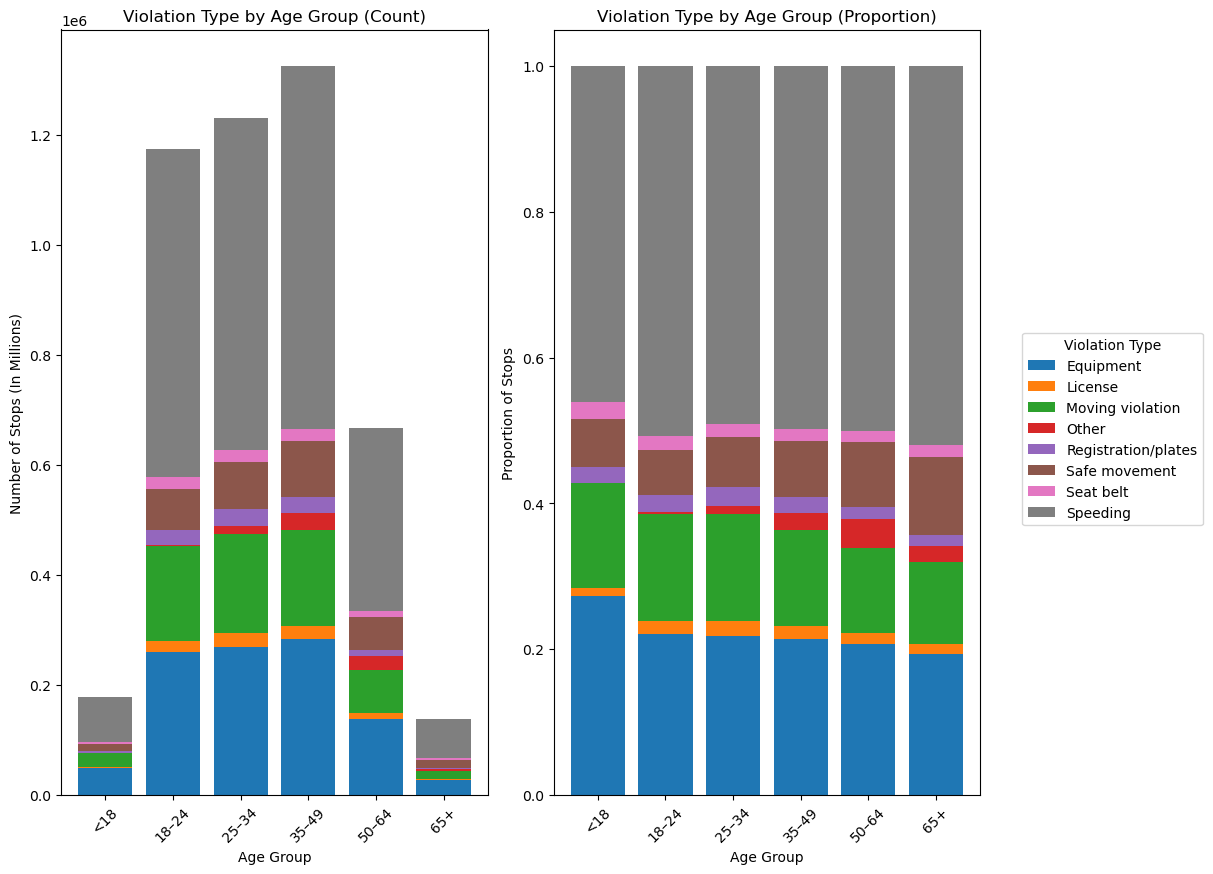

In [72]:
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18–24', '25–34', '35–49', '50–64', '65+']

IL['age_group'] = pd.cut(IL['driver_age'], bins=bins, labels=labels, right=True)

violation_by_age = (IL.groupby(['age_group', 'violation']).size().reset_index(name = 'count'))
violation_by_age_pivot = violation_by_age.pivot(index = 'violation', columns = 'age_group', values = 'count')
prop_violation_by_age_pivot = violation_by_age_pivot.div(violation_by_age_pivot.sum(axis = 0), axis = 1)

fig, axes = plt.subplots(1, 2, figsize=(10, 9))

violation_by_age_pivot.T.plot(kind = 'bar', stacked = True, ax = axes[0], width = 0.8)
axes[0].set_title('Violation Type by Age Group (Count)')
axes[0].set_ylabel('Number of Stops (In Millions)')
axes[0].set_xlabel('Age Group')
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].legend_.remove()

prop_violation_by_age_pivot.T.plot(kind = 'bar', stacked = True, ax = axes[1], width = 0.8)
axes[1].set_title('Violation Type by Age Group (Proportion)')
axes[1].set_ylabel('Proportion of Stops')
axes[1].set_xlabel('Age Group')
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].legend_.remove()

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Violation Type", loc="center left", bbox_to_anchor=(1.02, 0.5), ncol = 1)

plt.tight_layout()
plt.show()

Violation Type by Age Group (Count):
- Age groups 18-24, 25-34, and 35-49 have the most traffic stops among all age groups
- There is a sharp drop in traffic stops after 50 where age groups 50-64 and 65+ have far fewer total stops, where 65+ is the age group with the least number of stops
- Drivers <18 have very low counts
    - could be due to the number of licensed individuals/the number of miles driven by that age group
- Speeding is the single largest category, followed by equipment and moving violations

Violation Type by Age Group (Proportion):
- Speeding violations tends to increase steadily with age, with age groups 18-24 and 65+ being the ones with the highest proportion of speeding violations
- Equipment violations decreases steadily with age, with drivers <18 having the highest proportion of equipment traffic stops
    - Suggests that younger drivers are more likely to have vehicle compliance issues and that older drivers maintain their vehicles better (could possibly due to vehicle age where younger drivers tend to have older vehicles that are more prone to equipment issues but more information is needed to confirm)
- Moving violations are relatively stable among age groups but with a slight decline after age 50 while safe movement is relatively stable among age groups but with a slight increase after age 50
    - Indicates similar rates of movement-related enforcement across age groups
- Seatbelts, registration/plates, and license-related traffic stops are low and stable among all age groups

In this dataset, young and middle aged drivers dominate total traffic stops which can be driven by driving patterns such as the amount/distance they drive. It is also evidence that in this dataset, there are behavioral differences by age where younger drivers have more equipment related stops while older drivers have more behavior related stops (such as speeding and movement)

Now that the overall dataset is understood better, let's look at the research questions posed at the beginning of the project and answer them.

### 1. How do time and location shape traffic demand, and how can these patterns be used for officer staffing and deployment?

In this dataset, traffic demand can be operationalized as the combination of volume and intensity of traffic enforcement activity which will be measured by the number of traffic stops and the time required to complete them.

To examine how time and location shape traffic demand, I will first explore how traffic stop volume and duration vary by hour of day, day of week, and month. I will then assess how these measures differ across police districts in order to identify predictable temporal and spacial patterns in officer workload.

As we have seen previously, there was a noticable dip in the number of traffic stops starting 2011 and onward. In order to ensure that this shift doesn't obscure underlying traffic demand patterns, I will examine both the full set of data and a subset of the data (2011 onwards).

#### Time vs Traffic Demand

Let's look at how time shapes traffic demand. Specifically we will look at when traffic demand is the highest and lowest (which was already touched upon in the high-level EDA).

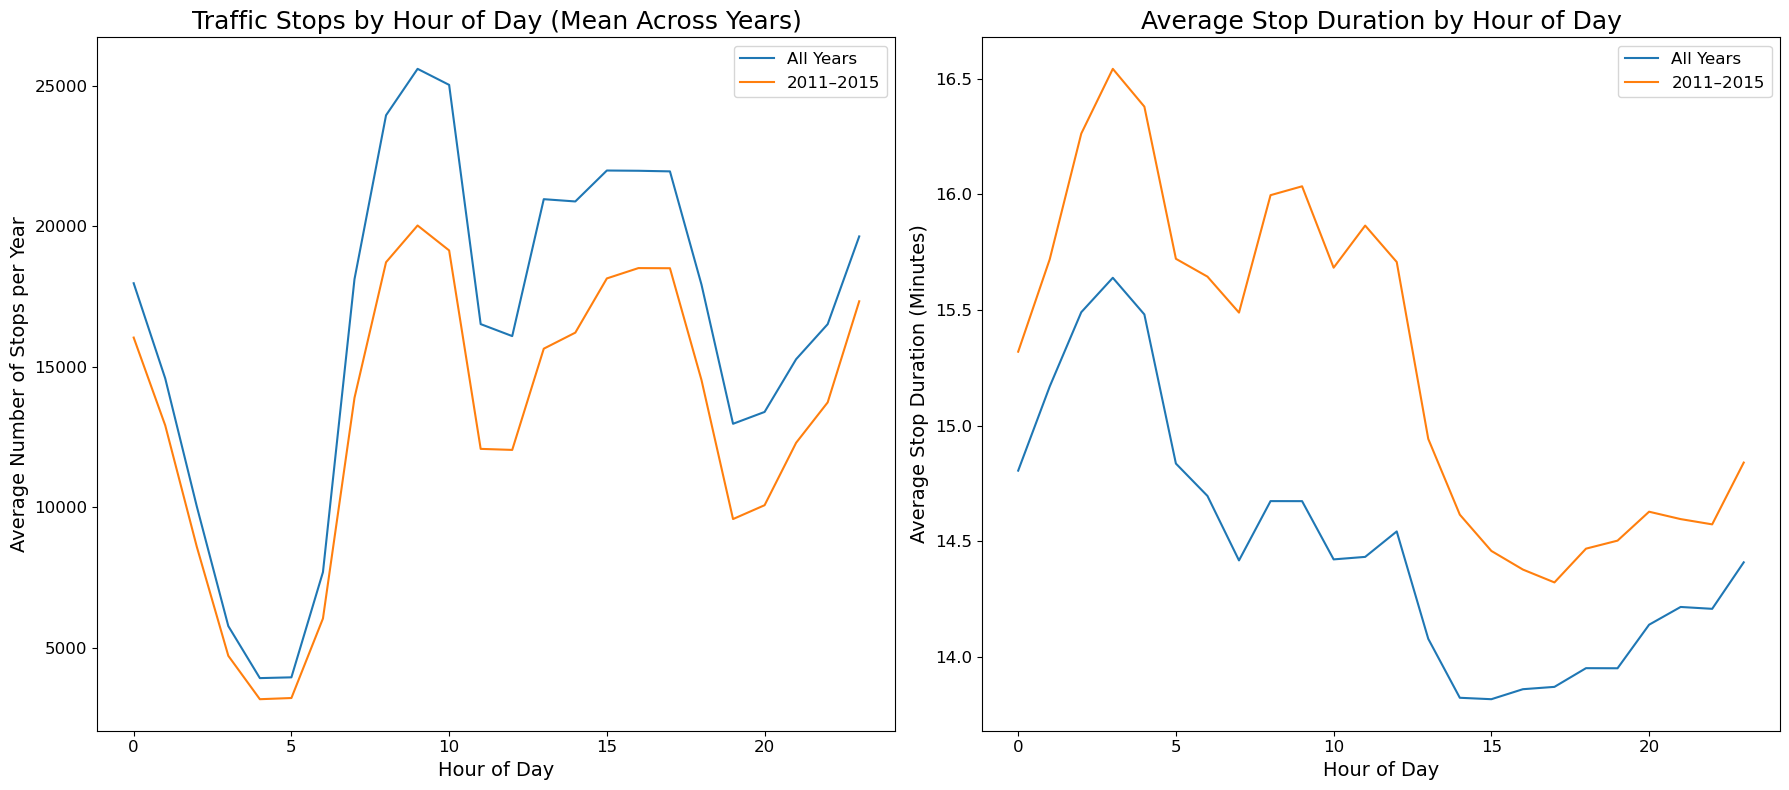

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

IL.groupby(['year', 'hour']).size().groupby('hour').mean().plot(ax=ax[0], label='All Years')
IL[IL['year']>=2011].groupby(['year', 'hour']).size().groupby('hour').mean().plot(ax=ax[0], label='2011–2015')
ax[0].set_xlabel('Hour of Day', fontsize=14)
ax[0].set_ylabel('Average Number of Stops per Year', fontsize=14)
ax[0].set_title('Traffic Stops by Hour of Day (Mean Across Years)', fontsize=18)
ax[0].legend(fontsize=12)
ax[0].tick_params(labelsize=12)

IL.groupby('hour')['stop_duration_imputed'].mean().plot(ax=ax[1], label='All Years')
IL[IL['year']>=2011].groupby('hour')['stop_duration_imputed'].mean().plot(ax=ax[1], label='2011–2015')
ax[1].set_xlabel('Hour of Day', fontsize=14)
ax[1].set_ylabel('Average Stop Duration (Minutes)', fontsize=14)
ax[1].set_title('Average Stop Duration by Hour of Day', fontsize=18)
ax[1].legend(fontsize=12)
ax[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Traffic stops are not evenly distributed across time and exhibit pronounced hourly patterns. Within both the full dataset and the subset, stop volume is lowest during the early morning hours (3-6AM), reaching a minimum around 4-5AM. On the other hand, stop volume peaks during the early morning commute (8-10AM), with additional smaller peaks observed in the early afternoon (1-5PM) and late evening (11PM-1AM). 

For both datasets, average stop duration also varies by hour. The longest average stop durations occur during the early morning hours, which coincides with the period of lowest stop volume. Conversely, average stop duration is lowest during the afternoon (2-3PM) which is a period of relatively high stop volume.

Together, these patterns suggest an inverse relationship between stop volume and stop duration across the day, indicating that periods of lower traffic demand may be associated with more time intensive stops.

Looking at the differences between the full dataset and the subset, we can see that although the volume of stops per year decreases for 2011-2015, the hourly trend stays relatively the same. Average stop duration trends also remain the same but the values are increased when looking at 2011-2015. 

Overall, the trends seen in the number of traffic stops and average stop duration stays relatively the same when looking at the full dataset and the subset. While during the 2011-2015 time period, number of traffic stops decrease in comparison to the full dataset, the average stop duration increases.

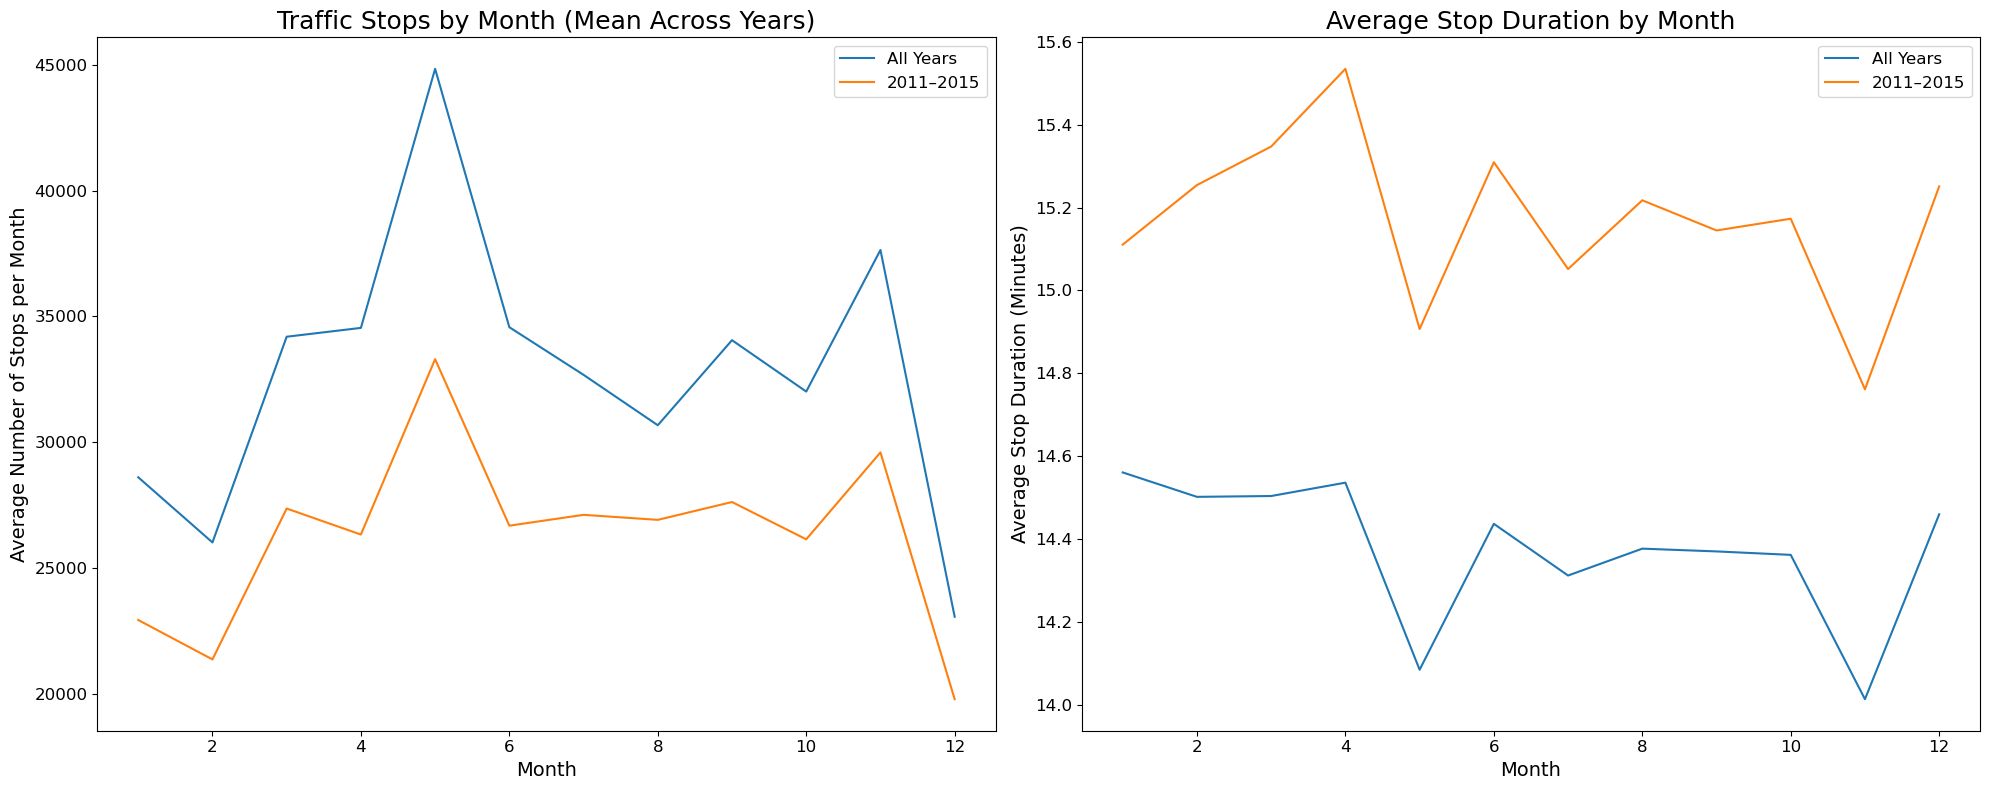

In [74]:
#Month vs Traffic Stop Count and Stop Duration
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

IL.groupby(['year', 'month']).size().groupby('month').mean().plot(ax=ax[0], label='All Years')
IL[IL['year']>=2011].groupby(['year', 'month']).size().groupby('month').mean().plot(ax=ax[0], label='2011–2015')
ax[0].set_xlabel('Month', fontsize=14)
ax[0].set_ylabel('Average Number of Stops per Month', fontsize=14)
ax[0].set_title('Traffic Stops by Month (Mean Across Years)', fontsize=18)
ax[0].legend(fontsize=12)
ax[0].tick_params(labelsize=12)

IL.groupby('month')['stop_duration_imputed'].mean().plot(ax=ax[1], label='All Years')
IL[IL['year']>=2011].groupby('month')['stop_duration_imputed'].mean().plot(ax=ax[1], label='2011–2015')
ax[1].set_xlabel('Month', fontsize=14)
ax[1].set_ylabel('Average Stop Duration (Minutes)', fontsize=14)
ax[1].set_title('Average Stop Duration by Month', fontsize=18)
ax[1].legend(fontsize=12)
ax[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Traffic stops in both datasets also exhibit clear variation across months, both following the same trend. Stop volume is lowest during the winter months, with December having the fewest traffic stops overall. In addition, stop volume increases substantially in late spring and fall, peaking in May and November.

Meanwhile, average stop duration displays an inverse seasonal pattern relative to stop volume for both datasets. Average stop durations are highest from December through April, coinciding with the period of lowest traffic stop volume. Conversely, average stop durations are lowest in May and November, which correspond to months with the highest stop volumes.

Together, these patterns suggest that periods of lower traffic demand are associated with longer, more time-intensive stops, while higher-volume months are characterized by shorter average stop durations.

Looking at the differences between the full dataset and the subset, we can see that although the volume of stops per year decreases and the average stop duration increases, the monthly trends stay relatively the same.

Overall, although the trends seen in the number of traffic stops and average stop duration stays relatively the same when looking at the full dataset and the subset, the number of traffic stops between 2011-2015 decrease in comparison to the full dataset, while the average stop duration increases.

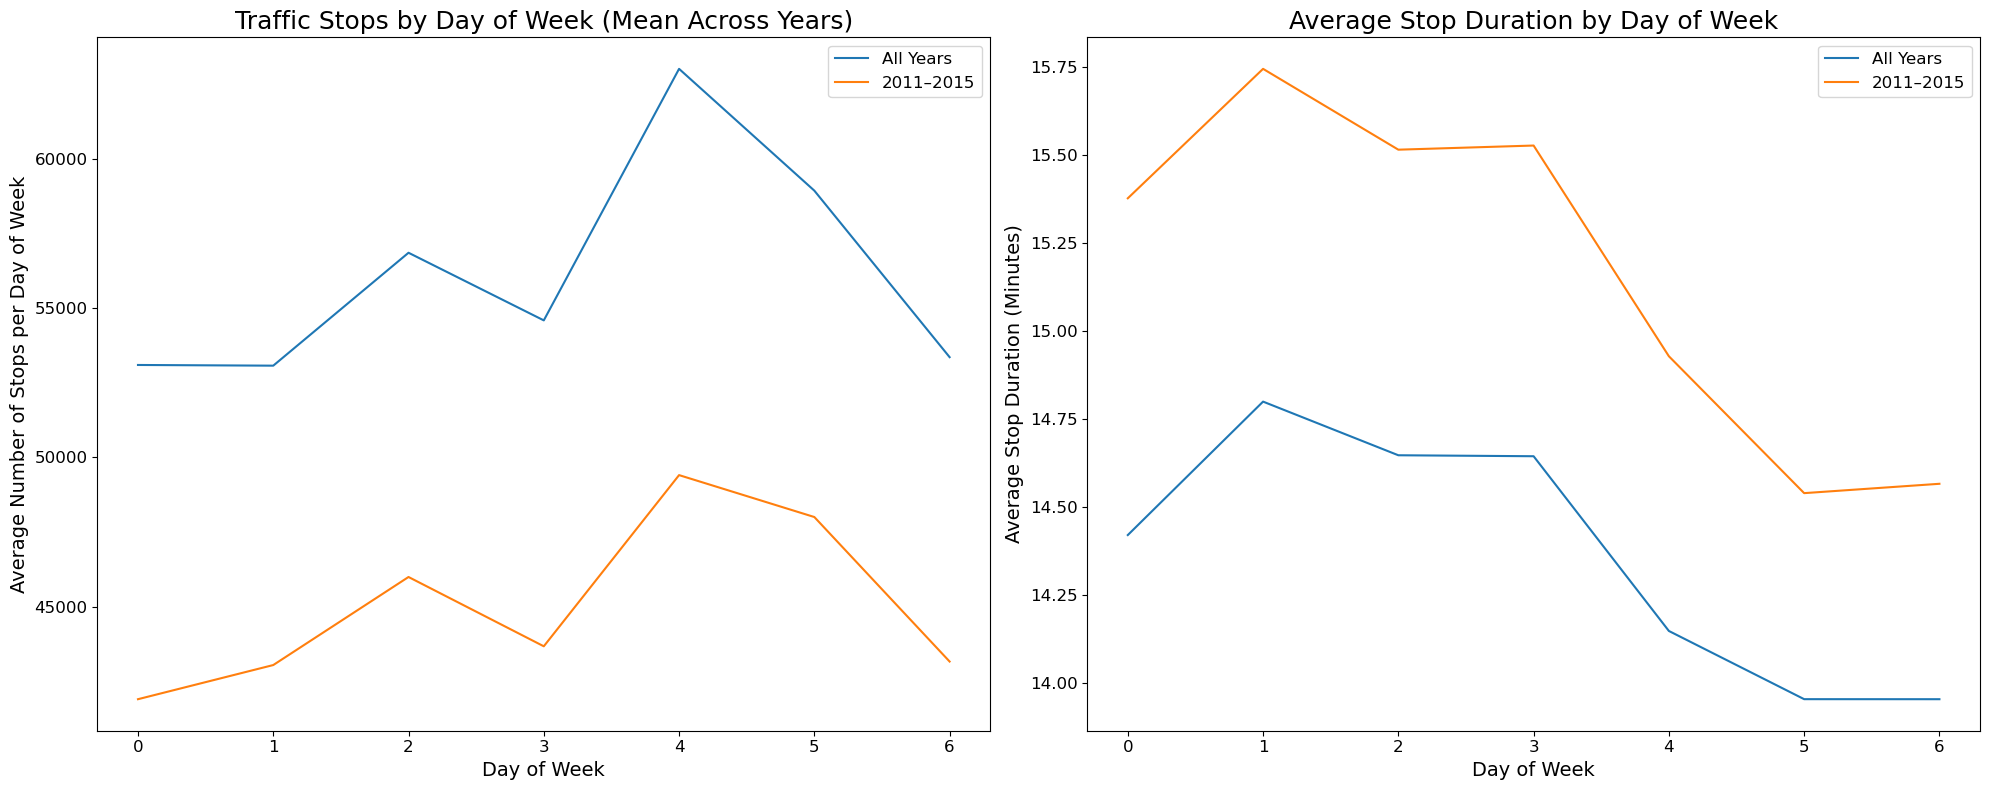

In [75]:
#Month vs Traffic Stop Count and Stop Duration
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

IL.groupby(['year', 'day_of_week']).size().groupby('day_of_week').mean().plot(ax=ax[0], label='All Years')
IL[IL['year']>=2011].groupby(['year', 'day_of_week']).size().groupby('day_of_week').mean().plot(ax=ax[0], label='2011–2015')
ax[0].set_xlabel('Day of Week', fontsize=14)
ax[0].set_ylabel('Average Number of Stops per Day of Week', fontsize=14)
ax[0].set_title('Traffic Stops by Day of Week (Mean Across Years)', fontsize=18)
ax[0].legend(fontsize=12)
ax[0].tick_params(labelsize=12)

IL.groupby('day_of_week')['stop_duration_imputed'].mean().plot(ax=ax[1], label='All Years')
IL[IL['year']>=2011].groupby('day_of_week')['stop_duration_imputed'].mean().plot(ax=ax[1], label='2011–2015')
ax[1].set_xlabel('Day of Week', fontsize=14)
ax[1].set_ylabel('Average Stop Duration (Minutes)', fontsize=14)
ax[1].set_title('Average Stop Duration by Day of Week', fontsize=18)
ax[1].legend(fontsize=12)
ax[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Traffic stops exhibit clear variation across days of the week, following the same trend in both datasets. Stop volume is lowest from Sunday through Tuesday, with Thursday also showing relatively lower levels of activity. In contrast, traffic stop volume increases toward the end of the week, peaking on Friday and Saturday.

Average stop duration also varies by day of the week but follows a different pattern. For both datasets, stop duration is highest on Tuesday, with Wednesday and Thursday close behind. In contrast, average stop duration is lowest on Saturday and Sunday, with Friday also exhibiting relatively short average durations. 

Together, these patterns indicate that periods of higher stop volume—particularly weekends—are associated with shorter average stop durations, while lower-volume weekdays tend to involve more time-intensive stops.

Looking at the differences between the full dataset and the subset, we can see that although the volume of stops per year decreases and the average stop duration increases, the monthly trends stay relatively the same.

Overall, although the trends seen in the number of traffic stops and average stop duration stays relatively the same when looking at the full dataset and the subset, the number of traffic stops between 2011-2015 decrease in comparison to the full dataset, while the average stop duration increases.

#### Location vs Traffic Demand

Let's look at how location, specifically police district shapes traffic demand.

In [76]:
stops_all = IL.groupby(['year', 'district']).size().groupby('district').mean()

stops_2011 = IL[IL['year']>=2011].groupby(['year', 'district']).size().groupby('district').mean()

dur_all = IL.groupby('district')['stop_duration_imputed'].mean()

dur_2011 = IL[IL['year']>=2011].groupby('district')['stop_duration_imputed'].mean()

df = pd.DataFrame({'stops_all': stops_all,'stops_2011': stops_2011,'dur_all': dur_all,'dur_2011': dur_2011}).sort_index()

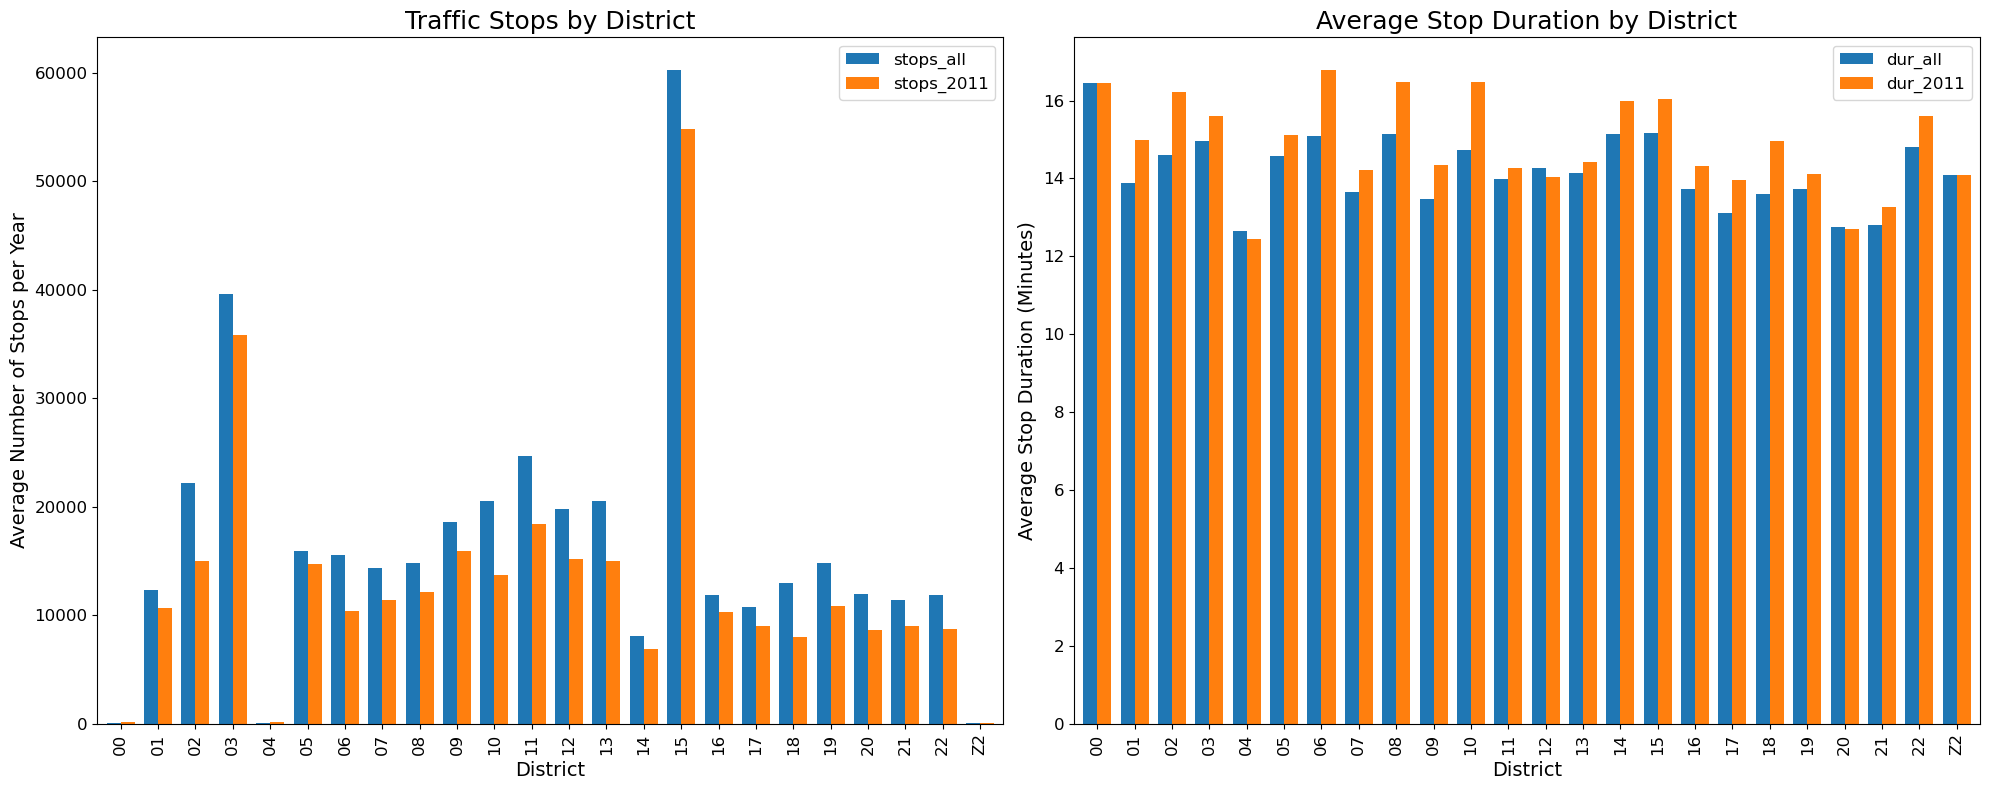

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

df[['stops_all', 'stops_2011']].plot(kind='bar', ax=ax[0], width = 0.75)
ax[0].set_xlabel('District', fontsize=14)
ax[0].set_ylabel('Average Number of Stops per Year', fontsize=14)
ax[0].set_title('Traffic Stops by District', fontsize=18)
ax[0].legend(fontsize=12)
ax[0].tick_params(labelsize=12)

df[['dur_all', 'dur_2011']].plot(kind='bar', ax=ax[1], width = 0.75)
ax[1].set_xlabel('District', fontsize=14)
ax[1].set_ylabel('Average Stop Duration (Minutes)', fontsize=14)
ax[1].set_title('Average Stop Duration by District', fontsize=18)
ax[1].legend(fontsize=12)
ax[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Traffic demand varies substantially across police districts for both datasets, with traffic stops highly concentrated in a small number of locations. District 15 and 03 account for a disproportionately large share of total traffic stops, while Districts 00, 04, and Z2 exhibit substantially low stop volumes relative to the rest. This uneven distribution indicates that traffic enforcement activity is spatially concentrated rather than evenly distributed across districts.

Average stop duration also varies across districts for both datasets, though the magnitude of this variation is smaller than that observed for stop volume. The average stop duration generally falls between approximately 12 and 16.5 minutes.

Together, these patterns suggest that staffing decisions should account for both the concentration of stop volume across districts and the time intensity of stops, as these dimensions of workload do not align uniformly across locations.

The full dataset consistently has a larger number of stops per year across districts in comparison to 2011-2015 although the average duration of stops is usually higher during stops between 2011 and 2015. 

Overall Takeaway:

Across time and location, traffic demand occurs in clear and systematic patterns rather than uniformly. Traffic stop volume varies predictably by hour of the day, day of the week, and month, all with periods of high and low activity. Stop volume tends to peak during daytime and evening hours, toward the end of the week, and during late spring and late fall months. Early mornings, midweek days, and winter months, on the other hand, consistently have lower traffic stop volumes. These patterns are nearly identical in the full dataset and in the 2011-2015 subset.

Stop duration has shown to follow a complementary but distinct pattern that are also nearly identical in both datasets. Periods with a lower stop volume are associated with longer average stop durations, whereas periods of higher stop volume are associated with shorter and less time-intensive stops. This inverse relationship suggests that traffic demand cannot be fully captured by stop counts or stop durations alone, but instead they need to be analyzed concurrently.

Spatially, traffic enforcement activity is highly concentrated across certain police districts, with a small number of districts accounting for a disproportionatly large share of traffic stops. While average stop duration also varies across districts, these differences are more moderate. These trends can be seen in both datasets as well.

As additional district information, such as differences in district responsibilities, district level staffing, jurisdiction size, and enforcement priorities, is not publicly available, these factors are not considered within this analysis and may help explain some of the observed differences.

These observed temporal and spatial patterns have direct implications for officer staffing and deployment. Periods and locations with consistently high traffic demand may benefit from increased officer presence. At the same time, it is important to recognize that observed traffic stop counts and stop durations may themselves be influenced by staffing levels, information that is also not publicly available. Districts or time periods with more officers assigned to traffic enforcement may record higher stop volumes simply due to increased enforcement capacity, while higher workload periods may incentivize shorter and more streamlined stops and vice versa. As a result, observed traffic demand may reflect both underlying traffic conditions and policing capacity, although this cannot be confirmed with the traffic stop data alone.

**Implications for Staffing and Deployment + Analytic Constraints:**

These temporal and spatial patterns seen in traffic stop volume and duration suggest several ways in which traffic enforcement resources could be more efficiently allocated. Periods of heavy stop volumes such as the morning and evening rush and midnight, weekends, and certain months indicate times when predicted traffic patrol is elevated. Aligning officer staffing levels during these periods is recommended. Similarly, the spacial concentration of traffic stops across a small number of police districts suggests that these districts can both require and benefit from higher baseline staffing levels. In addition, extra support might be needed during peak periods, which can be supplied by lower demand districts. Notably, an inverse relationship is seen between stop volume and duration and emphasizes the importance of considering both of these metrics together when assessing demand as this gives a clearer and more holistic view of workload. 

While this analysis provides an overview of how traffic enforcement activity varies across time and location that identifies recurring patterns that can be useful for operational planning, it does not establish a causal relationship or prescribe specific staffing levels. This analysis is particularly contrained by publicly unavailable key variables such as officer staffing levels, jurisdiction boundaries and size, traffic volume, and enforcement policies, procedures, and priorities. Because of this, these observed traffic stop patterns likely reflect a combination of underlying conditions that this analysis was unable to explore. For this reason, this analysis should be viewed as a foundation for further investigation rather than an assessment of optimal staffing and enforcement effectiveness.

### 2. How do combinations of stop characteristics influence traffic stop escalation risk?

This question seeks to answer what combinations of stop factors capture whether the stop moved beyond a routine interaction. In this dataset, stop characteristics can be operationalized to the following variables: district, driver_gender, driver_age, driver_race, violation, hour_of_day, month, day_of_week. Escalation risk will be operationalized to non-routine stop characteristics such as if a search was conducted (search_type is anything but 'No Search'), contraband was found (contraband_found), or if it involved drugs (drugs_related_stop).

First step is to create a binary column indicating if the stop was escalated or not. Since this dataset is missing some values, these observations will be conservatively treated as non-escalated when calculating the escalated column.

In [79]:
IL['escalated'] = ((IL['search_type'].fillna('No Search') != 'No Search') | 
                   (IL['contraband_found'].fillna(False) == True) | 
                   (IL['drugs_related_stop'].fillna(False) == True)).astype(int)

IL['escalated'].value_counts(normalize=True)

escalated
0    0.959968
1    0.040032
Name: proportion, dtype: float64

Using the operationalized definition of escalation, only about 4% of the traffic stops in this dataset involved a non-routine escalation such as a search, finding contraband, or raising a drug-related flag.

Let's look at escalation rates for the following variables: district, driver_gender, driver_age, driver_race, violation, hour_of_day, month, day_of_week

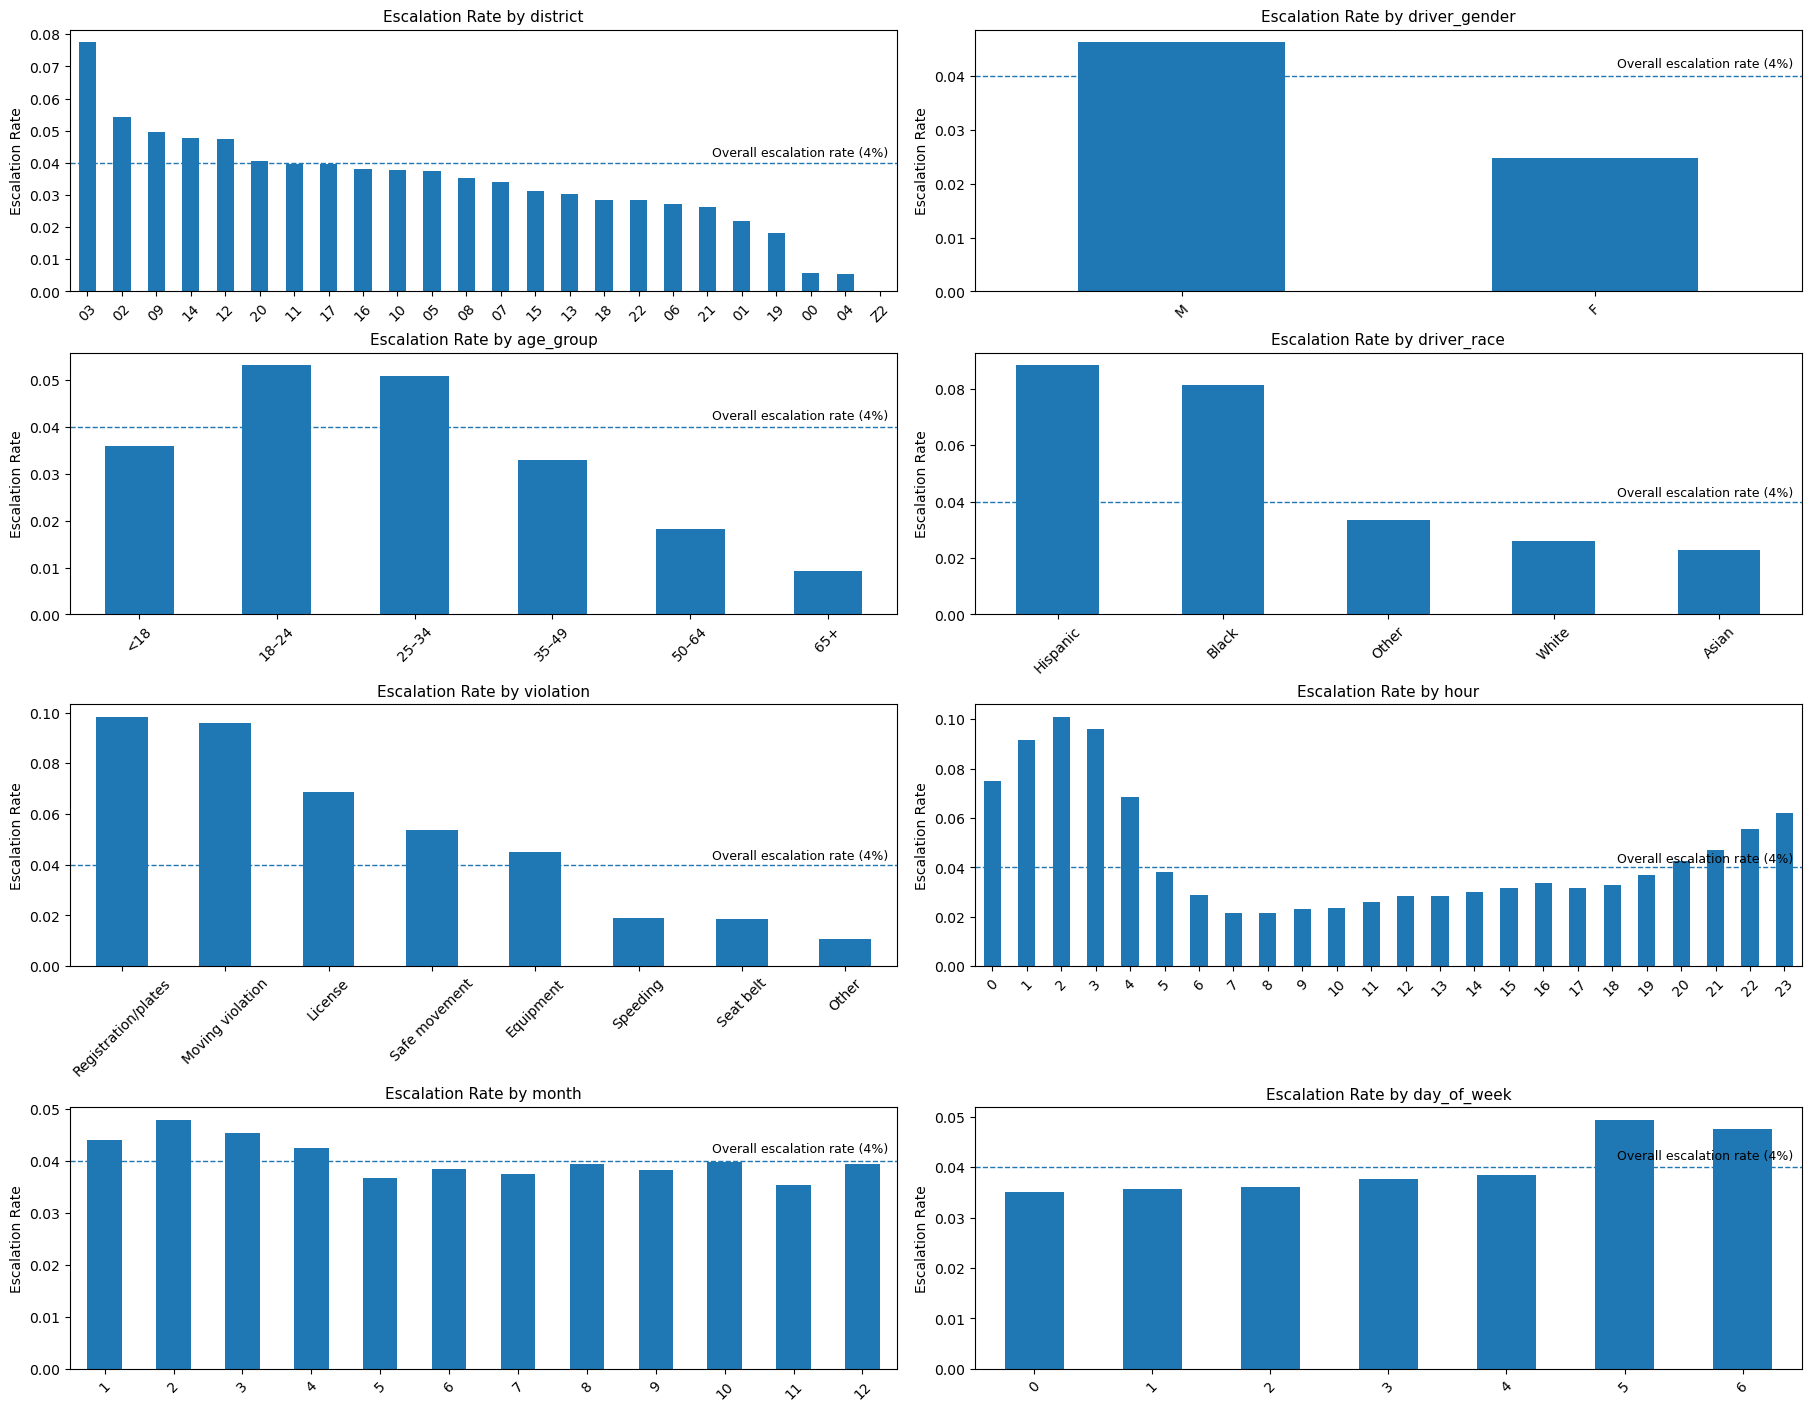

In [104]:
esc_rate_cols = ['district', 'driver_gender', 'age_group', 'driver_race', 'violation', 'hour', 'month', 
                 'day_of_week']

unsorted_cols = ['hour', 'month', 'day_of_week', 'age_group']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 14), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, esc_rate_cols):

    rates = IL.groupby(col)['escalated'].mean()

    if col not in unsorted_cols:
        rates = rates.sort_values(ascending=False)

    rates.plot(kind='bar', ax=ax)

    ax.set_title(f'Escalation Rate by {col}', fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('Escalation Rate')

    ax.axhline(y=0.04, linestyle='--', linewidth=1)

    ax.text(0.99, 0.041, 'Overall escalation rate (4%)', ha='right', va='bottom',
            transform=ax.get_yaxis_transform(), fontsize=9)

    ax.tick_params(axis='x', rotation=45)

plt.show()

District: 
- District escalation rates range from 0 to ~7.8%. District 03 has the highest escalation rates with almost 2x the baseline escalation rate, districts 00 and 04 have about a 0.5% escalation rate, and district Z2 has a 0% escalation rate.
   - Since districts Z2, 04, and 00 had the lowest escalation rates and also have a small sample size in comparison to the other districts, the low escalation rate might be a result of this.

Gender:
- In this dataset, male traffic stops were escalated 4.6% of the time while female traffic stops were escalated 2.5% of the time.

Age Groups:
- Relative to the overall baseline escalation rate of 4%, age groups 18-24 and 25-34 are well above the average while age groups 50-64 and 65+ are well below the average. We can see that escalation risk peaks among young adult drivers and decreases steadily with age.

Driver Race:
- We can see that escalation rates vary by driver race with Hispanic and Black driver traffic stops being escalated more than double the baseline rate while White and Asian driver stops are escalated well below the baseline rate.

Violation:
- Escalation risk varies drastically by violation type, with registration/plate, moving violation, and license violations being far more likely to escalate than speeding or seat belt violations.

Hour:
- Escalation risk varies sharply by time of day, peaking during nighttime hours (late night and early morning), and reaching its lowest levels during daytime hours.

Month:
- Escalation rates exhibit mild seasonal variation, with slightly higher rates in the late winter and early spring months.

Day of the Week:
- Escalation rates are slightly higher on weekends compared to weekdays.

After exploring escalation rates of single variables, we have seen that stop characteristics such as district, hour of day, violation, race, and age group have notable differences. In contrast, stop characteristics such as driver gender, day of week, and month exhibit more modest differences. These patterns drive exploration of interactions among variables exhibiting the greatest differences.

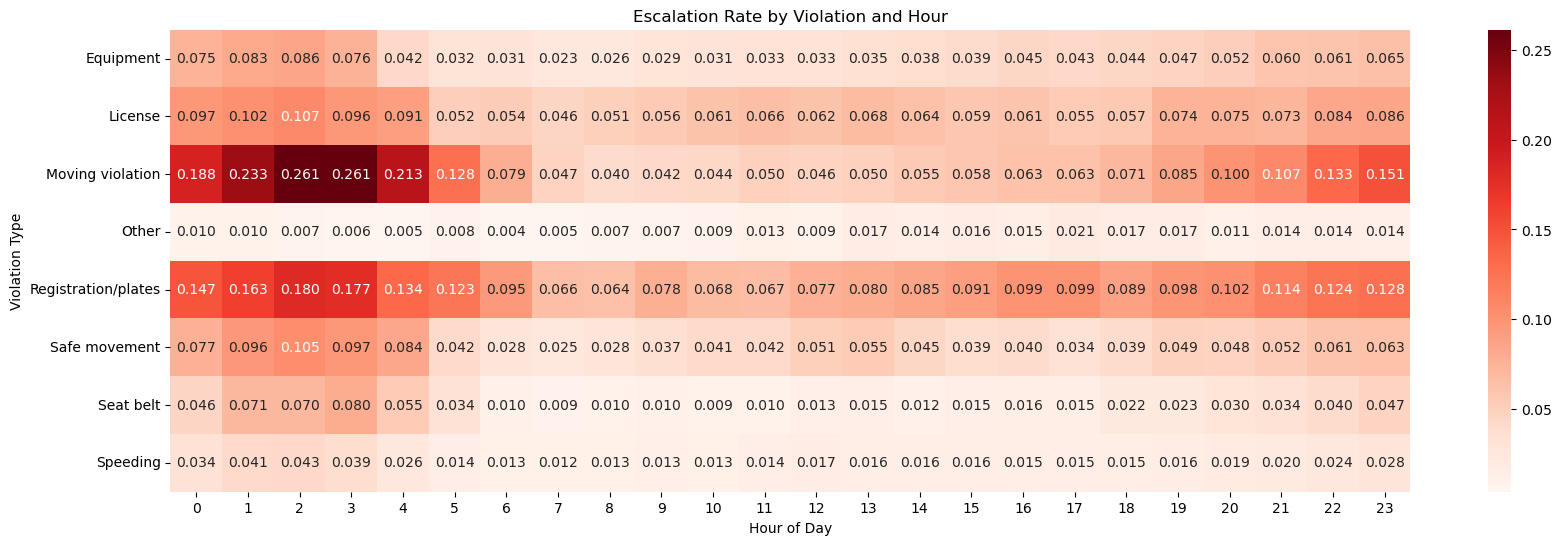

In [105]:
heatmap_data = (pd.crosstab(IL['violation'],IL['hour'],values=IL['escalated'],aggfunc='mean'))

plt.figure(figsize=(20,6))
sns.heatmap(heatmap_data,cmap='Reds',annot=True, fmt=".3f")

plt.title('Escalation Rate by Violation and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Violation Type')
plt.show()

Escalation risk is driven far more by combinations of violation type and hour of day than by either factor alone. Across nearly every violation type, escalation rates peak between 12AM and 4AM, sharply decrease in the daytime hours, and rise again during the night. The strongest interaction is seen in moving violations in the early morning hours (12AM-4AM) where escalation risk reaches over 26%. This suggests a shift in enforcement objectives during overnight periods. The same happens to registration/plates and license violations but on a smaller scale where escalation rates reach over 18% and 10% respectively, a rate which is not seen with either variable alone.

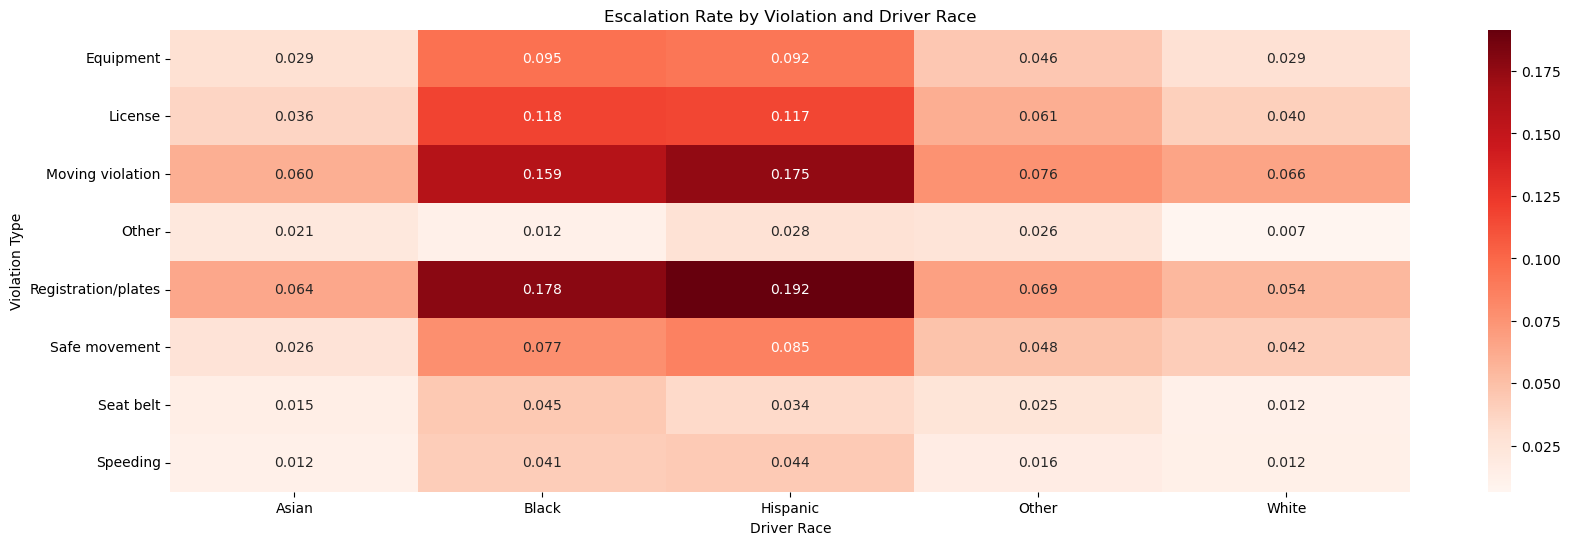

In [106]:
heatmap_data = (pd.crosstab(IL['violation'],IL['driver_race'],values=IL['escalated'],aggfunc='mean'))

plt.figure(figsize=(20,6))
sns.heatmap(heatmap_data,cmap='Reds',annot=True, fmt=".3f")

plt.title('Escalation Rate by Violation and Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Violation Type')
plt.show()

For several violation categories, especially moving violations and registration/plates, escalation rates for Black and Hispanic drivers exceed those than for White and Asian drivers. These differences are seen within the same violation categories, indicating that racial differences in escalation cannot be explained only by differences in violation type.

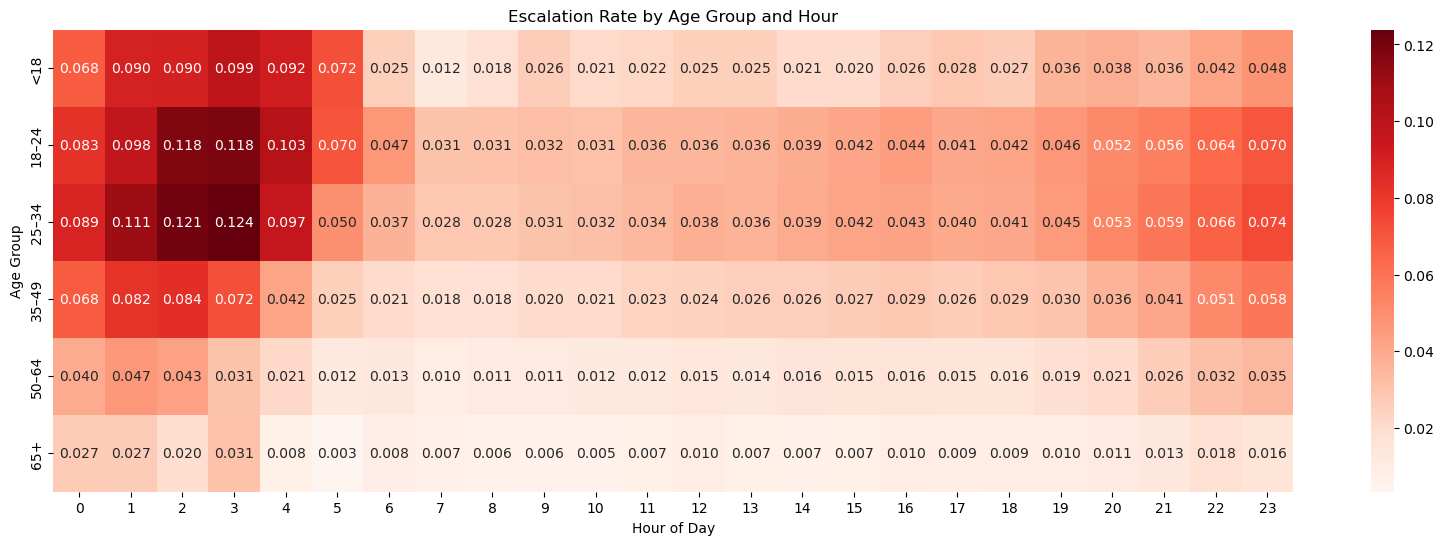

In [107]:
heatmap_data = (pd.crosstab(IL['age_group'],IL['hour'],values=IL['escalated'],aggfunc='mean'))

plt.figure(figsize=(20,6))
sns.heatmap(heatmap_data,cmap='Reds',annot=True, fmt=".3f")

plt.title('Escalation Rate by Age Group and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Age Group')
plt.show()

Escalation risk varies by age group, which is amplified at night, especially among young adult drivers. Generally, escalation risk decreases steadily with age, meaning that age effects are not driven by a single time window, but are instead persistent. Looking at the interaction between hour of day and age group, there is a strong interaction for drivers in the 18-24 and 25-34 age groups where escalation risk increases sharply during late night hours. Traffic stops in the daytime involving the same age group are far less likely to escalate. The same interaction is seen for drivers under 18 years of age, but on a smaller scale. For older drivers in the 50-64 and 65+ age groups, this interaction is barely present as these groups have a low escalation rate among all hours, indicating that the night time does not come with a high escalation rate for all drivers. Instead, this is primarily seen among younger drivers.

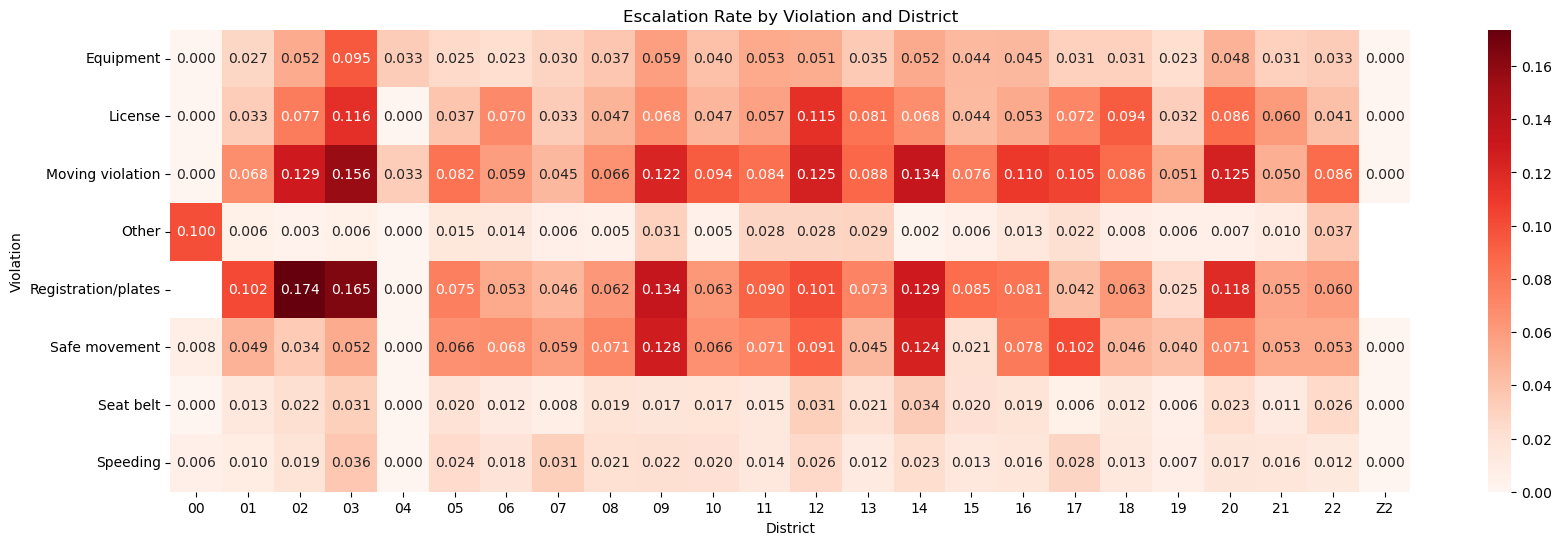

In [108]:
heatmap_data = (pd.crosstab(IL['violation'],IL['district'],values=IL['escalated'],aggfunc='mean'))

plt.figure(figsize=(20,6))
sns.heatmap(heatmap_data,cmap='Reds',annot=True, fmt=".3f")

plt.title('Escalation Rate by Violation and District')
plt.xlabel('District')
plt.ylabel('Violation')
plt.show()

Escalation risk varies across districts within the same violation types but these differences are less consistent than that seen in previous interactions. While no single district is consistently high across all violations, districts 02 and 03 show notably higher escalation rates for moving and registration/plate violations. Overall, violation specific patterns remain similar across districts, suggesting that district interactions do not dominate escalation risk relative to violation type, hour, or race.

Overall Takeaway:

After examining escalation rates in isolation clear differences emerged as district, age group, driver race, violation type and hour of day showed a wide range of variation while variables such as gender, day of the week, and month showed relatively moderate variation. Although some district showed notably low escalation rates, these patterns coincided with districts that also had small sample sizes, suggesting that these differences may be caused by insufficient data. Age also displayed strong relationships with escalation where escalation peaks among young drivers and decreases steadily by age. While exploring escalation rates by race, peak escalation rates that were well above the overall baseline were seen with hispanic and black drivers. Violation type also plays a major role, with moving, registration/plate, and license violations having a higher escalation rates than other violations such as speeding or seat belt.

These factors were then explored in parallel which revealed that escalation risk is driven far more by a combination of stop characteristics rather than just one in isolation. The strongest interaction is seen between violation type and hour, where escalation rates increase sharply in the late night and early morning hours across most violation types, especially for moving violations which exhibited the greatest interaction. This pattern is also exhibited for registration/plates and license violations to a smaller extent. Race and violation type also exhibits an interaction as across several violation categories, especially moving violations and registration/plates, escalation rates for Black and Hispanic drivers exceed those than for White and Asian drivers. Age group and hour also showed interactions where late night stops involving young adult drivers had a higher escalation rate while this interaction was barely present for older drivers. District and violation interactions were present but less dominant than other interactions and showed no obvious patterns. 

Overall, these result reveal that escalation risk is shaped by a small set of core factors such as violation type, time of day, age, and race. In addition, interactions between these variables have shown to amplify the escalation risk.

**Implications and Analytical Limitations:**

These results suggest that escalation risk is context dependent, especially for the combination of violation type and hour, as escalation rates increase substantially during the late night and early morning hours for almost all violation types. Interactions are also seen across race and violation type, age and hour, and district and violation. While this might reflect changes in enforcement priorities or responses, it may also be driven by unobserved differences such as impairment, warrants, officer safety concerns, and other risk factors not captured by these variables. In addition, this analysis is descriptive and does not establish any causality. For these reasons, these elevated escalation rates should not be interpreted as evidence of different enforcement behavior motivated by any of the explored factors. 

### Conclusion:

Using the Stanford Open Policing Project Illinois Traffic Stop Data, this project revealed that traffic demand and escalation risk follow clear patterns that are shaped by time, location, violation type, and driver characteristics. They are each influenced by contextual factors and the interactions between them. While this analysis does not establish causal relationship, it provides a data driven foundation for understanding where and when traffic enforcement activity is most concentrated and in what conditions escalation is most likely to occur. These insights can help inform operational planning and deployment, and also motivate a deeper investigation into whats driving these observed patterns.

**Areas for Further Investigation:**

There are several areas in this analysis where further data or investigation may help clarify the findings. As the distinction between underlying traffic demand and enforcement capacity remains unclear, incorporating officer staffing levels and deployment data along with traffic volume and district jurisdiction boundaries and size would allow for a better understanding of why these patterns emerge. As temporal and spatial patterns have clearly emerged, additional information on such would be extremely beneficial.

Incorporating additional factors such as indicators of impairment, warrent status, and officer safety concerns would also serve purpose in capturing the underlying context behind elevated escalation risk. This would allow for this analysis to be developed into a more complete assessment of traffic enforcement behavior and operational efficiency.

Lastly, future work on this data, such as multivariate regression, could help isolate the association of each stop characteristic with escalation risk while controlling for other factors. Causal inference techniques could strengthen this analysis by attempting to isolate effects under specific assumptions, although this would still be limited as there are unobserved variables in this data.